In [230]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import math
plt.rcParams['lines.linewidth'] = 3 #change the defulyt line width of ploting

# Q2 - Hadamard matrices and Hadamard-Walsh matrices


## Hadamard matrices

## 2.a

In [231]:
#Auxiliary func for hadamard matrix
def recursiveAuxiliary(k, hmat): 
    if 2**(k-1) == 1:
        return hmat
    else:
        return np.kron(hmat, recursiveAuxiliary(k-1, hmat))
    
#return the Hadamard 2^n (when n is input) matrix
def hadamardMatN(n): 
    if isinstance(n, int)!=True or n<0:
        raise Exception("Sorry, n must be integer above >=0")
    if n == 0:
        return np.array([[1]])
    size= 2**n
    h2 = np.array([[1,1],
                    [1,-1]])
    H2n= recursiveAuxiliary(n, h2)
    H2n=(1/math.sqrt(2**n))*H2n # we have to normalize the matrix
    return H2n
     
    
    

In [232]:
print("For example H2^2 is: ")
hadamardMatN(2)

For example H2^2 is: 


array([[ 0.5,  0.5,  0.5,  0.5],
       [ 0.5, -0.5,  0.5, -0.5],
       [ 0.5,  0.5, -0.5, -0.5],
       [ 0.5, -0.5, -0.5,  0.5]])

#### Hadamard matrix is define recursivly. H2n= normalization* [[H2n-1 , H2n-1],
####                                                [H2n-1 , -H2n-1]]

## 2.b

In [40]:
#create a list of the standard base functions (normalized) on dimension size n 
# domain is [ low , high ]
def standardBaseFunc(n, low , high): 
    if  low>=high:
        raise Exception("Sorry, low must be < high")
    func_num= 2**n
    domain_size=high-low
    uniform_delta = domain_size/func_num
    standard_list=[]
    standard_list.append(None) # let us start from index 1, so it wont be confusing
    for i in range(1,func_num+1):
        if i == func_num:
            si = lambda t,i=i:  (math.sqrt(func_num) * 1) if (low+(i-1)*uniform_delta) <= t and t <= (low+i*uniform_delta)  else 0
        else:
            si = lambda t,i=i:  (math.sqrt(func_num) * 1) if (low+(i-1)*uniform_delta) <= t and t < (low+i*uniform_delta)  else 0
        standard_list.append(si)
    return standard_list

In [41]:
#create a list of the Hadmard -('h') or Walsh - Hadamard ('hw') base functions (normalized) on dimension size n
# domain is [ low , high ]
def OrtBaseFunc(n,str1 ,low , high):
    if str1 == 'h':
        ortMat = hadamardMatN(n)
    if str1 == 'hw':
        ortMat = hwMatN(n)
    size= 2**n
    standard_list=standardBaseFunc(n , low, high)
    ort_func_list=[]
    ort_func_list.append(None) # let us start from index 1, so it wont be confusing
    if(n > 0):
        for row in range(0,size):
            ort_func = lambda t, row=row:  sum( (ortMat[row,col] * standard_list[col+1](t)) for col in range(0,size))
            ort_func_list.append(ort_func)
    else:
        ort_func = lambda t:  (ortMat[0,0] * standard_list[1](t)) # only 1-D
        ort_func_list.append(ort_func)
    return ort_func_list
    

In [237]:
#calculate a list of the Hadmard -('h') or Walsh - Hadamard ('hw') base functions samples (normalized) on dimension size n
def calculate_ortft(f ,t_arr): 
    y = np.empty([t_arr.size])
    i = 0
    for t_val in t_arr:
        y[i] = f(t_val)
        i = i+1
    return y

#ploting Hadmard -('h') or Walsh - Hadamard ('hw') base functions on dimension size n
# domain is [ 0 , 1 ]
def plotOrtFunc(n, str1):
    
    
    ort_func_list = OrtBaseFunc(n , str1 , 0 , 1)
    t_arr = np.linspace(0,1,100) # 100 linearly spaced numbers for sampling function
    i = 1
    
    if(n < 6):
        n_for_row = n
    else:
        n_for_row = 5
    
    fig,axes=plt.subplots(nrows=2**(n_for_row-1), ncols=2,figsize=(50,15))
    #figure(num=None, figsize=(8, 6), dpi=80, edgecolor='k')
    
    for row in range(0,2**(n_for_row-1)):
        for col in range(0,2):
            y_i = calculate_ortft(ort_func_list[i],t_arr)
            if str1 == 'h':
                axes[row][col].plot(t_arr,y_i, label=str1+ "_" +str(i)+"(t) for n = "+str(n),color='tab:red') # h\w_i(t)
            else:
                axes[row][col].plot(t_arr,y_i,label=str1+ "_" +str(i)+"(t) for n = "+str(n),color='tab:blue') # h\w_i(t)
            #axes[row][col].set_title(str1+ "" +str(i)+"(t) for n = "+str(n))
            axes[row][col].set(xlabel='t - axis', ylabel=str1+str(i)+"(t) - axis")
            axes[row][col].legend()
            #axes[row][col].ylabel("h"+str(i)+"(t) axis")
            i = i+1
            
   # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axes.flat:
        ax.label_outer()
        
    if(n >= 6): #for better ploting
        fig2,axes2=plt.subplots(nrows=2**(n_for_row-1), ncols=2,figsize=(50,15))
        #figure(num=None, figsize=(8, 6), dpi=80, edgecolor='k')
        for row in range(0,2**(n_for_row-1)):
            for col in range(0,2):
                y_i = calculate_ortft(ort_func_list[i],t_arr)
                if str1 == 'h':
                    axes2[row][col].plot(t_arr,y_i, label=str1+ "_" +str(i)+"(t) for n = "+str(n),color='tab:red') # h\w_i(t)
                else:
                    axes2[row][col].plot(t_arr,y_i,label=str1+ "_" +str(i)+"(t) for n = "+str(n),color='tab:blue') # h\w_i(t)
                axes2[row][col].set(xlabel='t - axis', ylabel=str1+str(i)+"(t) - axis")
                axes2[row][col].legend()
                i = i+1
            
       # Hide x labels and tick labels for top plots and y ticks for right plots.
        for ax in axes2.flat:
            ax.label_outer()

Double click on the figure to zoom in.
Ploting functions h_i(t) for n = 2 (2^n functions)


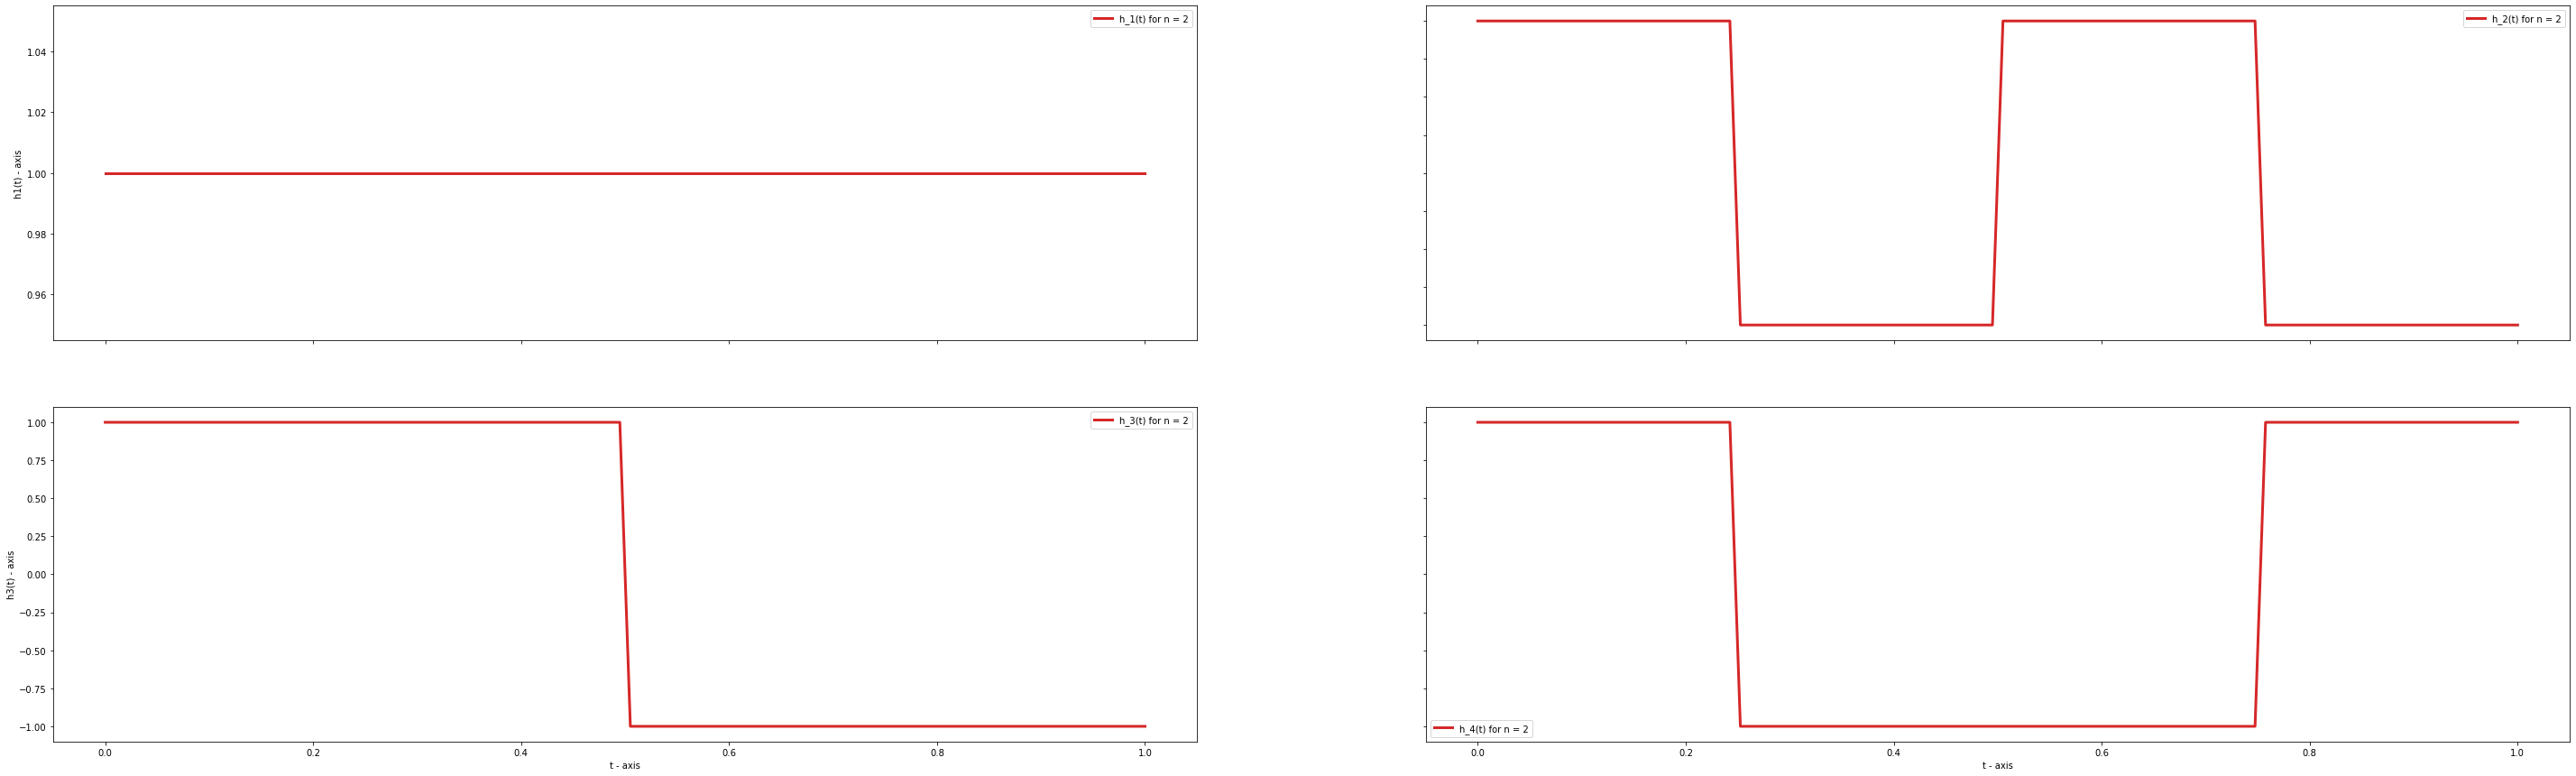

In [238]:
print("Double click on the figure to zoom in.")
print("Ploting functions h_i(t) for n = 2 (2^n functions)")
plotOrtFunc(2,'h')

Double click on the figure to zoom in.
Ploting functions h_i(t) for n = 3 (2^n functions)


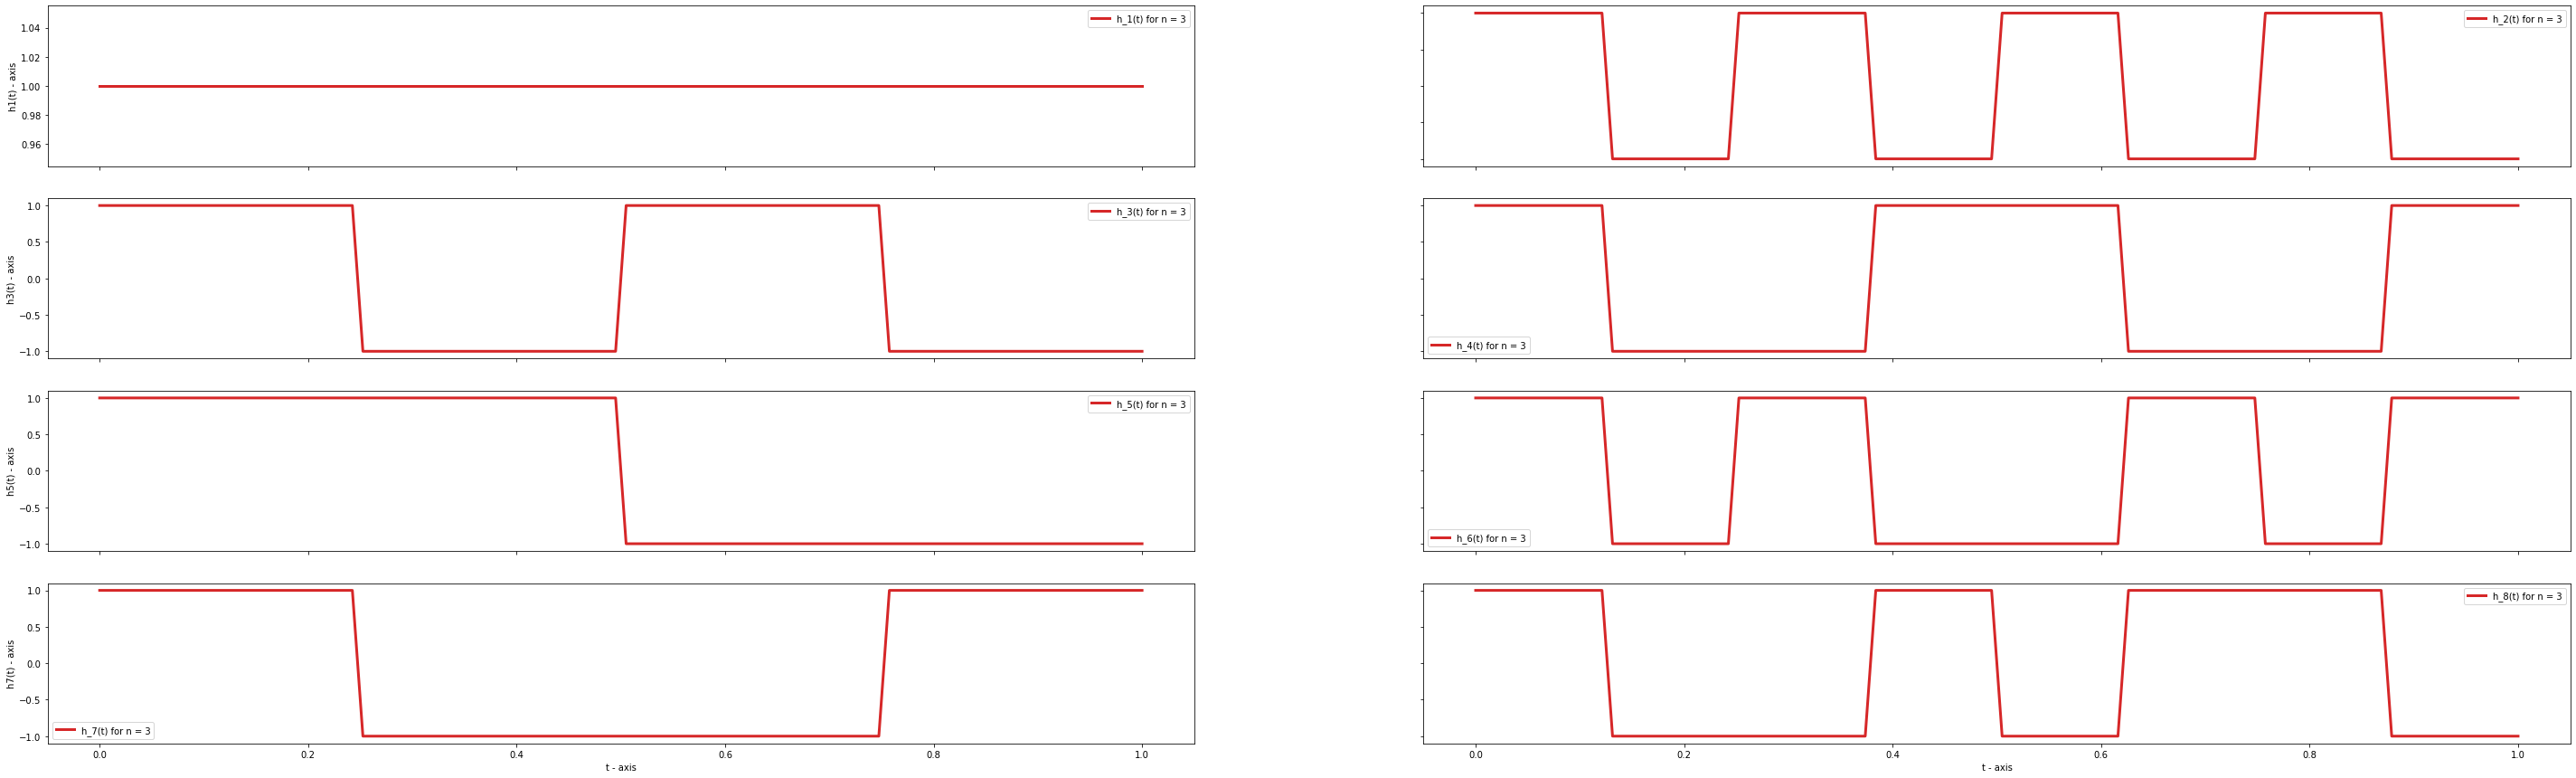

In [239]:
print("Double click on the figure to zoom in.")
print("Ploting functions h_i(t) for n = 3 (2^n functions)")
plotOrtFunc(3,'h')

Double click on the figure to zoom in.
Ploting functions h_i(t) for n = 4 (2^n functions)


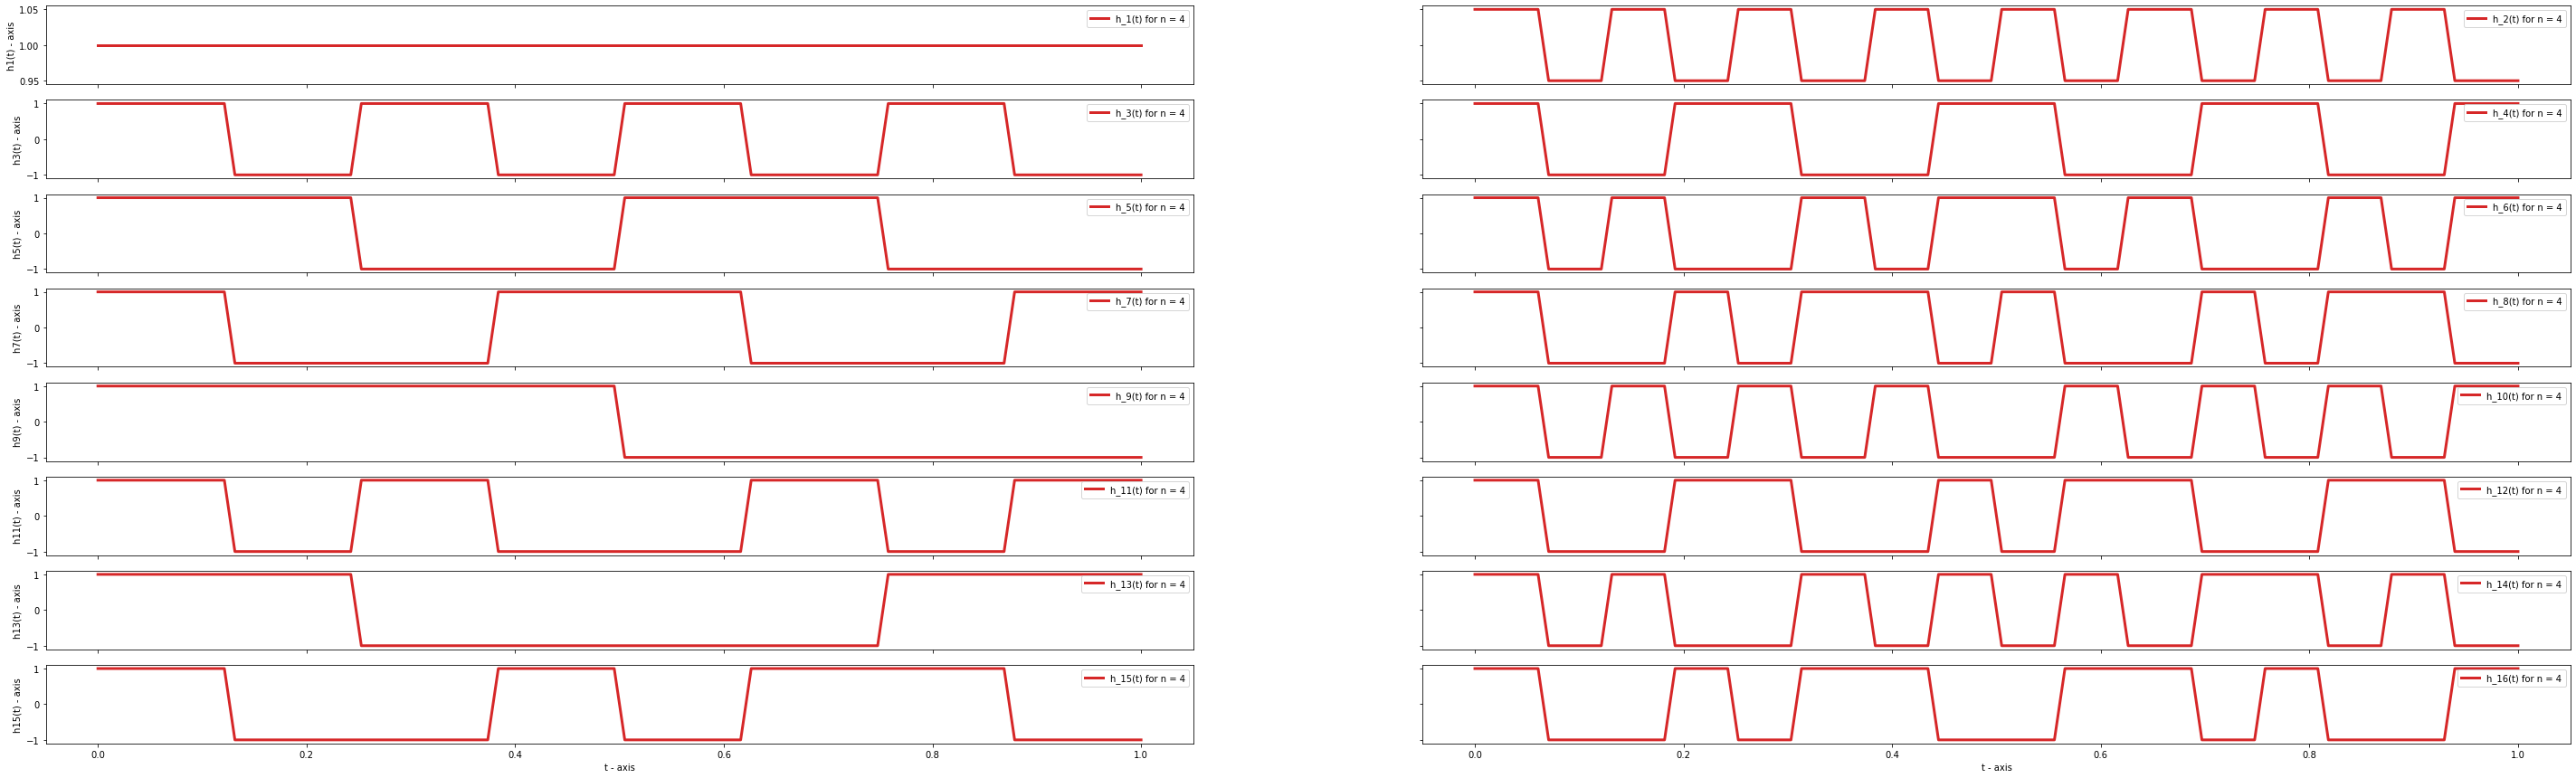

In [240]:
print("Double click on the figure to zoom in.")
print("Ploting functions h_i(t) for n = 4 (2^n functions)")
plotOrtFunc(4,'h')

Double click on the figure to zoom in.
Ploting functions h_i(t) for n = 5 (2^n functions)


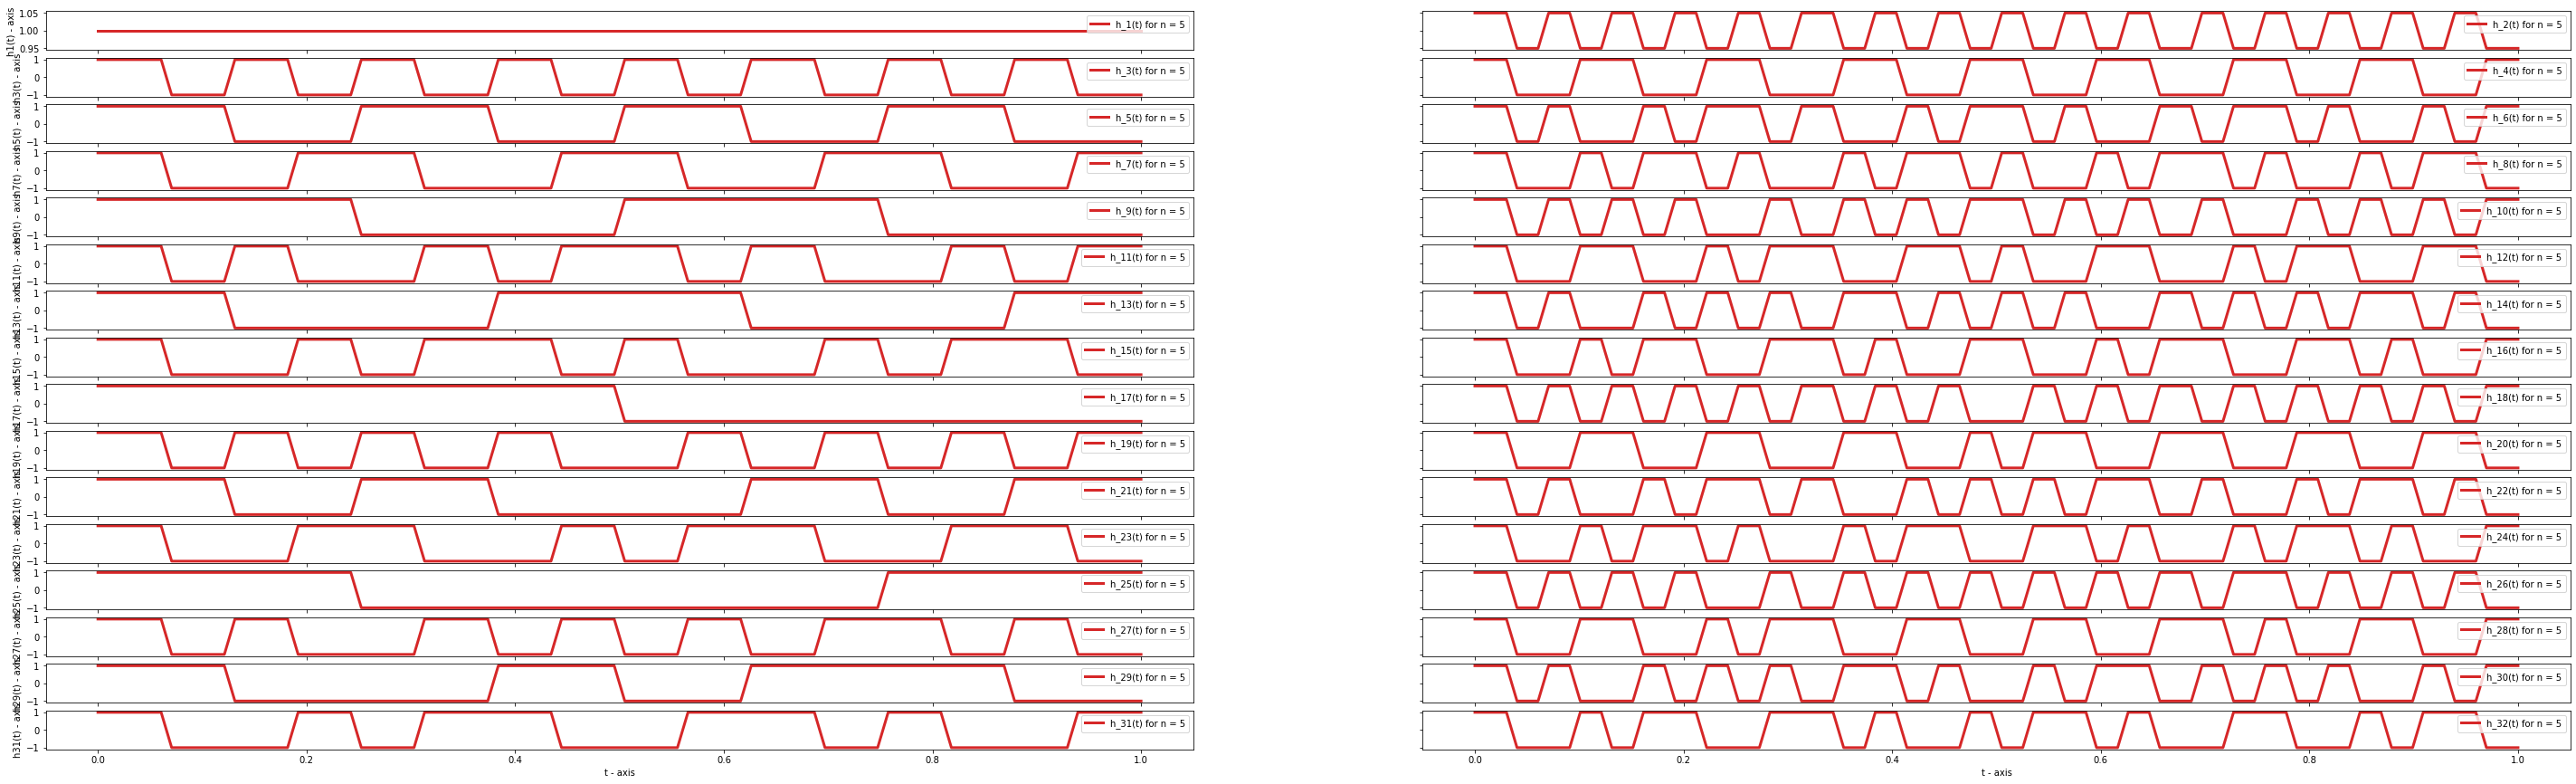

In [241]:
print("Double click on the figure to zoom in.")
print("Ploting functions h_i(t) for n = 5 (2^n functions)")
plotOrtFunc(5,'h')

Double click on the figure to zoom in.
Ploting functions h_i(t) for n = 6 (2^n functions)


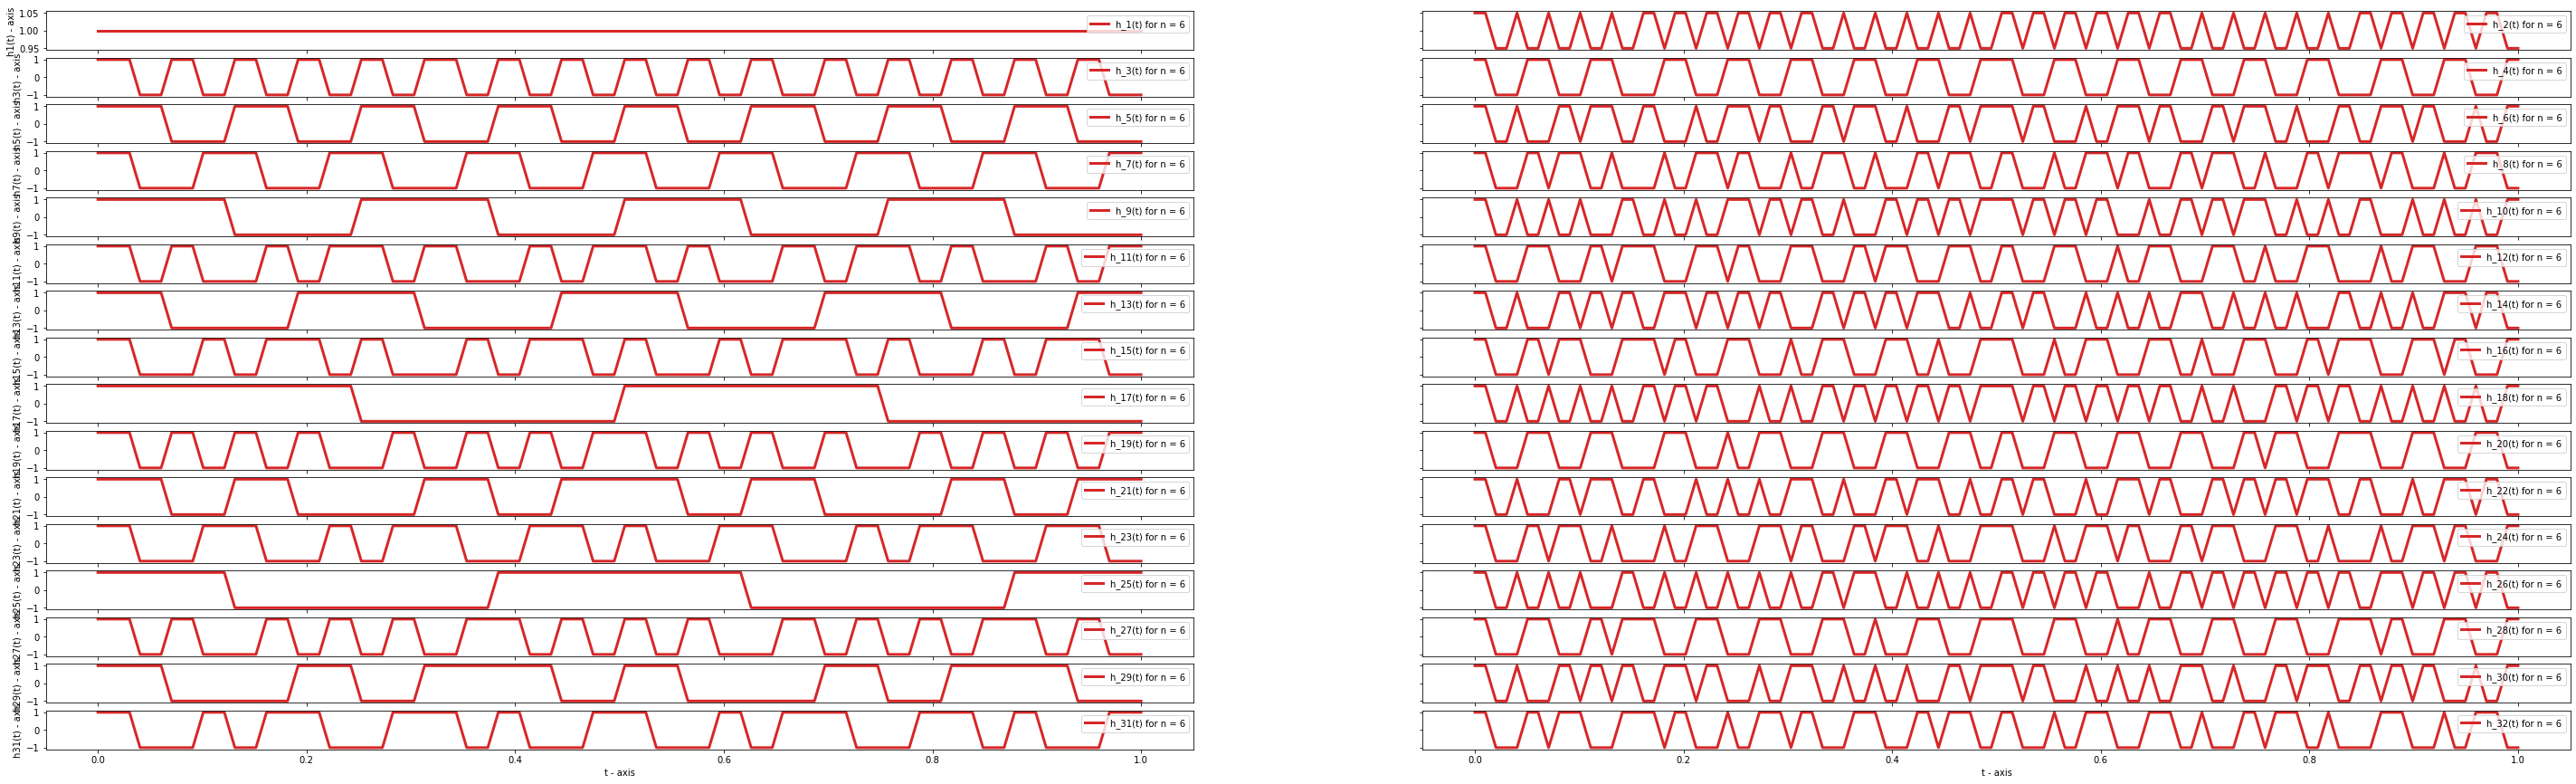

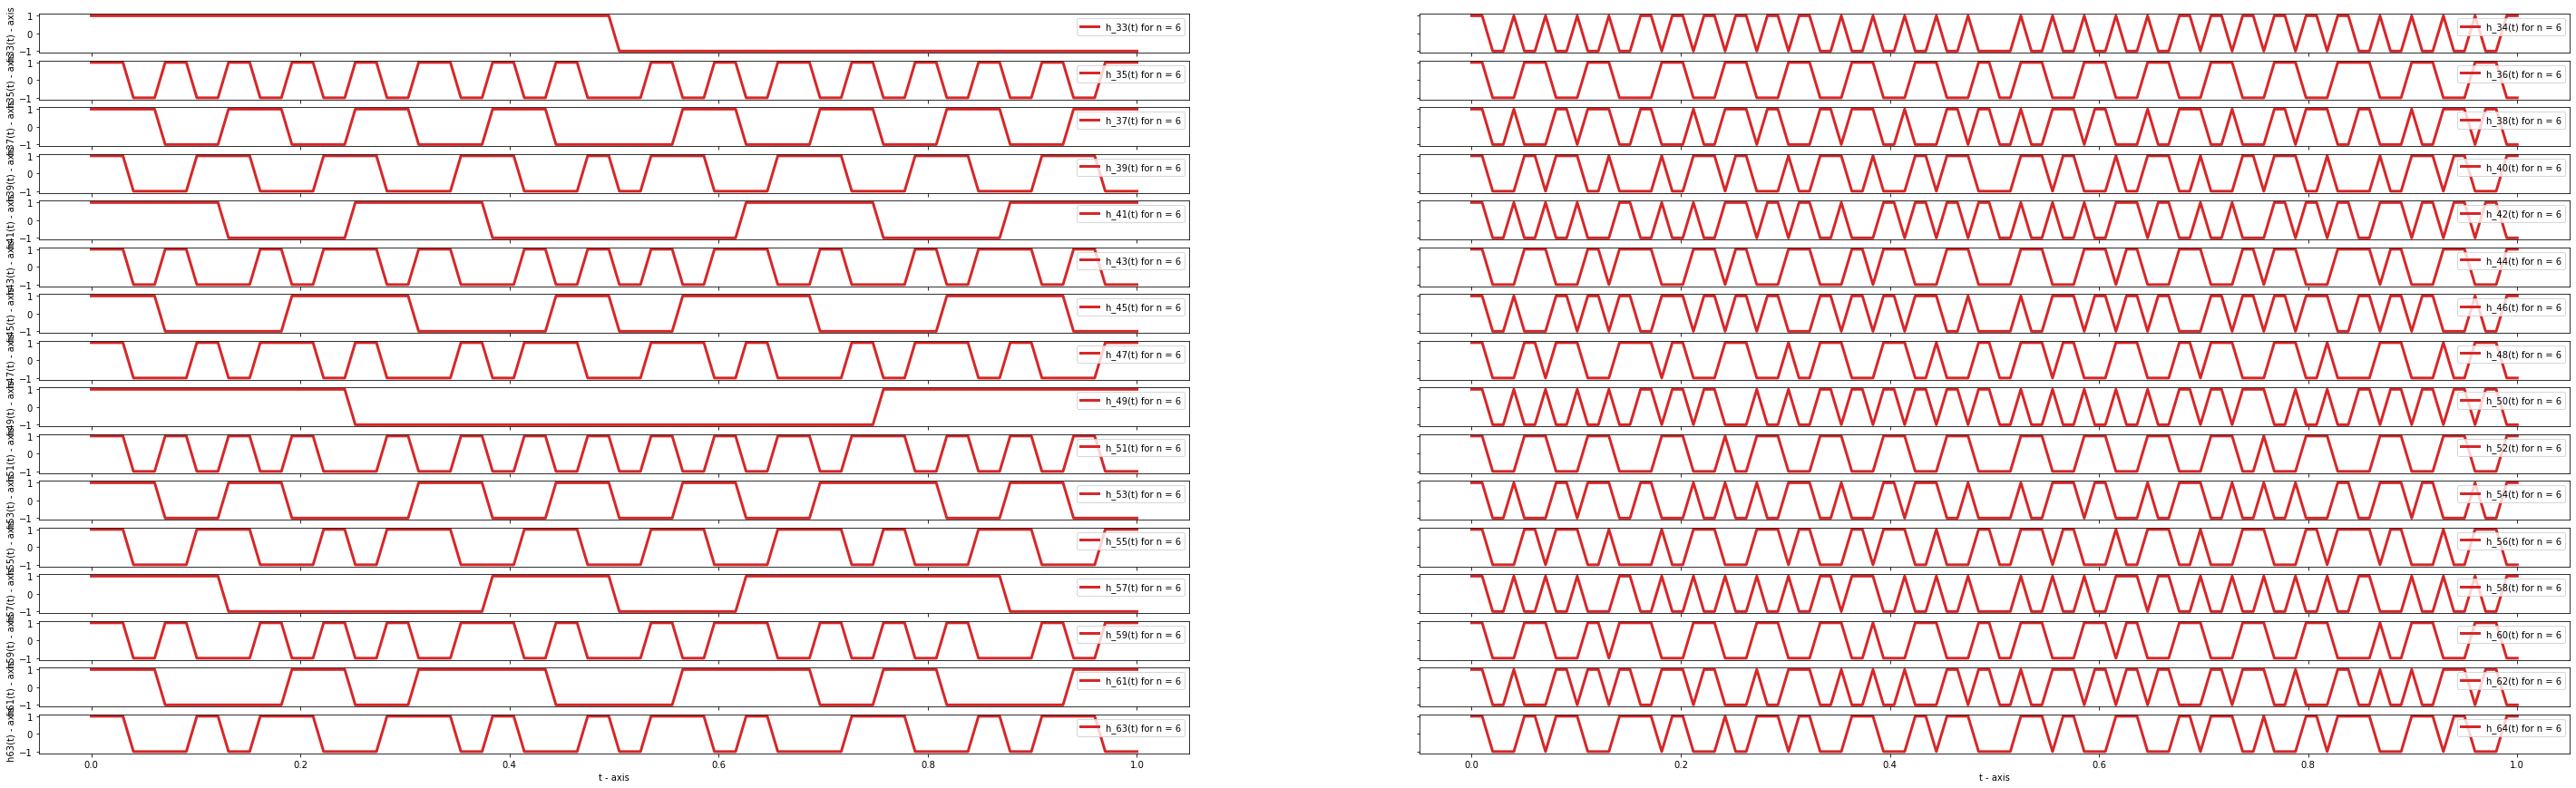

In [242]:
print("Double click on the figure to zoom in.")
print("Ploting functions h_i(t) for n = 6 (2^n functions)")
plotOrtFunc(6,'h')

## Hadamard-Walsh matrices

## 2.c

In [243]:
#return list of corresponding number of changes (1 to -1 or -1 to 1 * normalization) of each row in the Hadamard matrix
def countCahnges(h_mat):
    changes_arr=[]
    for row in h_mat:
        cnt=0
        for i in range(1,row.size):
            if row[i-1] != row[i]:
                cnt = cnt+1
        changes_arr.append(cnt)
    return changes_arr

#return the Hadamard-Walsh 2^n (when n is input) matrix
def hwMatN(n): 
    H2n = hadamardMatN(n)
    changes_arr = countCahnges(H2n)
    dict_rearange={}
    for i in range(len(changes_arr)):
        dict_rearange[i] = changes_arr[i]
    order_row_hw =sorted(dict_rearange, key=dict_rearange.__getitem__)
    HW2n = H2n[:, order_row_hw] #rearrange rows (or columns, the matrix is symmetric)
    return HW2n


In [244]:
print("For example HW2^2 is: ")
hwMatN(2)

For example HW2^2 is: 


array([[ 0.5,  0.5,  0.5,  0.5],
       [ 0.5,  0.5, -0.5, -0.5],
       [ 0.5, -0.5, -0.5,  0.5],
       [ 0.5, -0.5,  0.5, -0.5]])

#### Walsh - Hadamard matrix is define as Hadmard matrix rows sorted by counting the changes of entries in each row.

## 2.d

Double click on the figure to zoom in.
Ploting functions hw_i(t) for n = 2 (2^n functions)


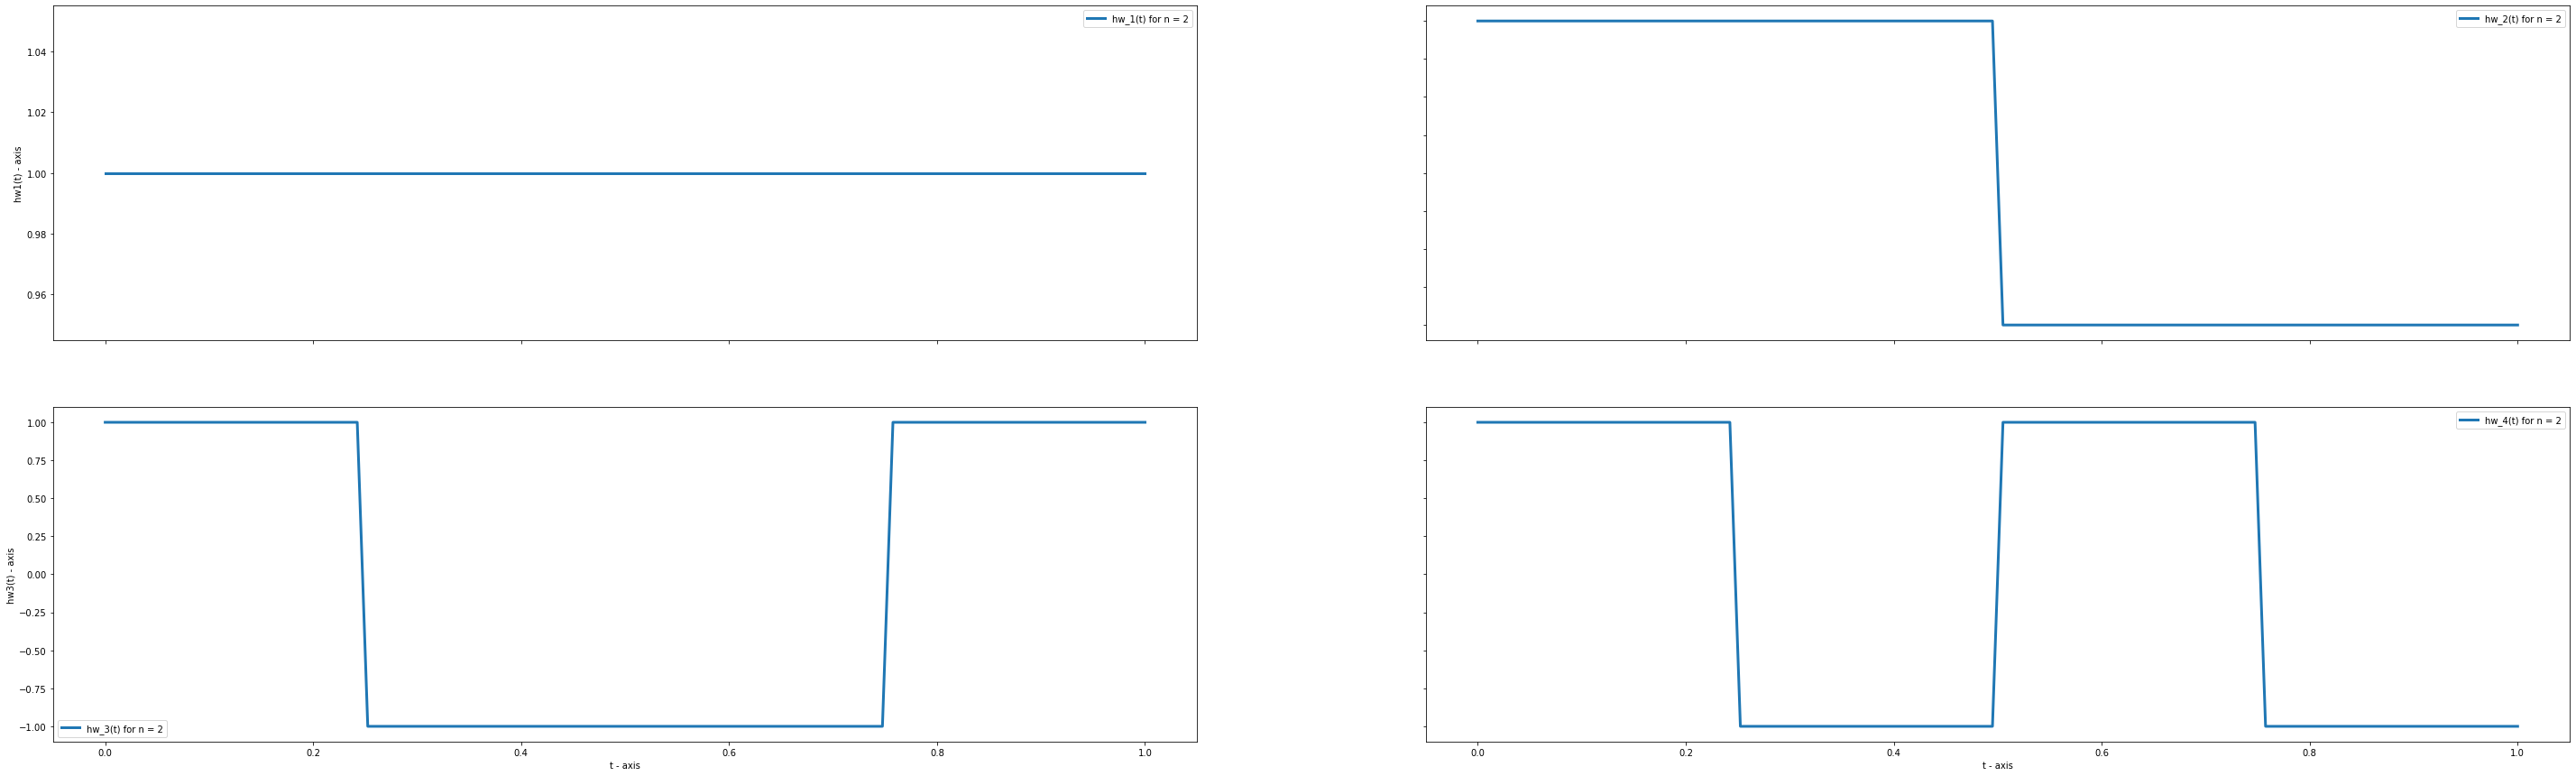

In [245]:
print("Double click on the figure to zoom in.")
print("Ploting functions hw_i(t) for n = 2 (2^n functions)")
plotOrtFunc(2,'hw')

Double click on the figure to zoom in.
Ploting functions hw_i(t) for n = 3 (2^n functions)


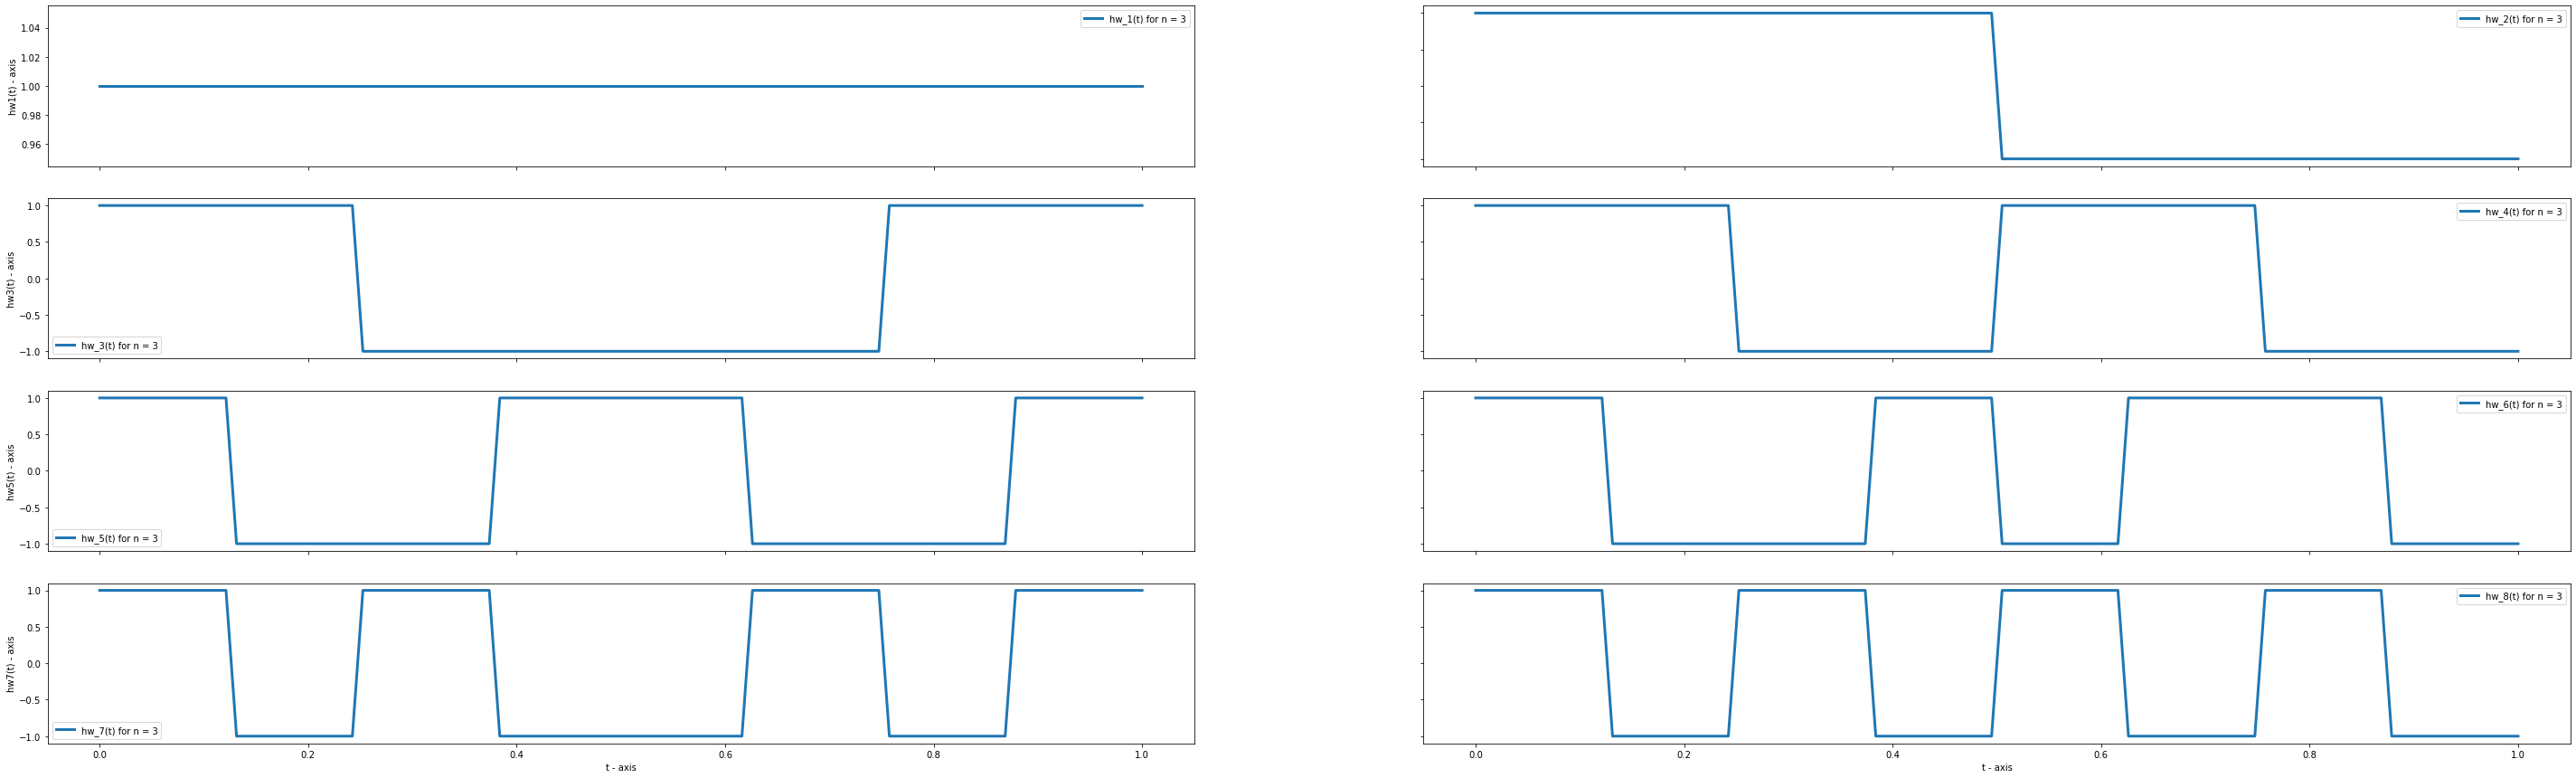

In [247]:
print("Double click on the figure to zoom in.")
print("Ploting functions hw_i(t) for n = 3 (2^n functions)")
plotOrtFunc(3,'hw')

Double click on the figure to zoom in.
Ploting functions hw_i(t) for n = 4 (2^n functions)


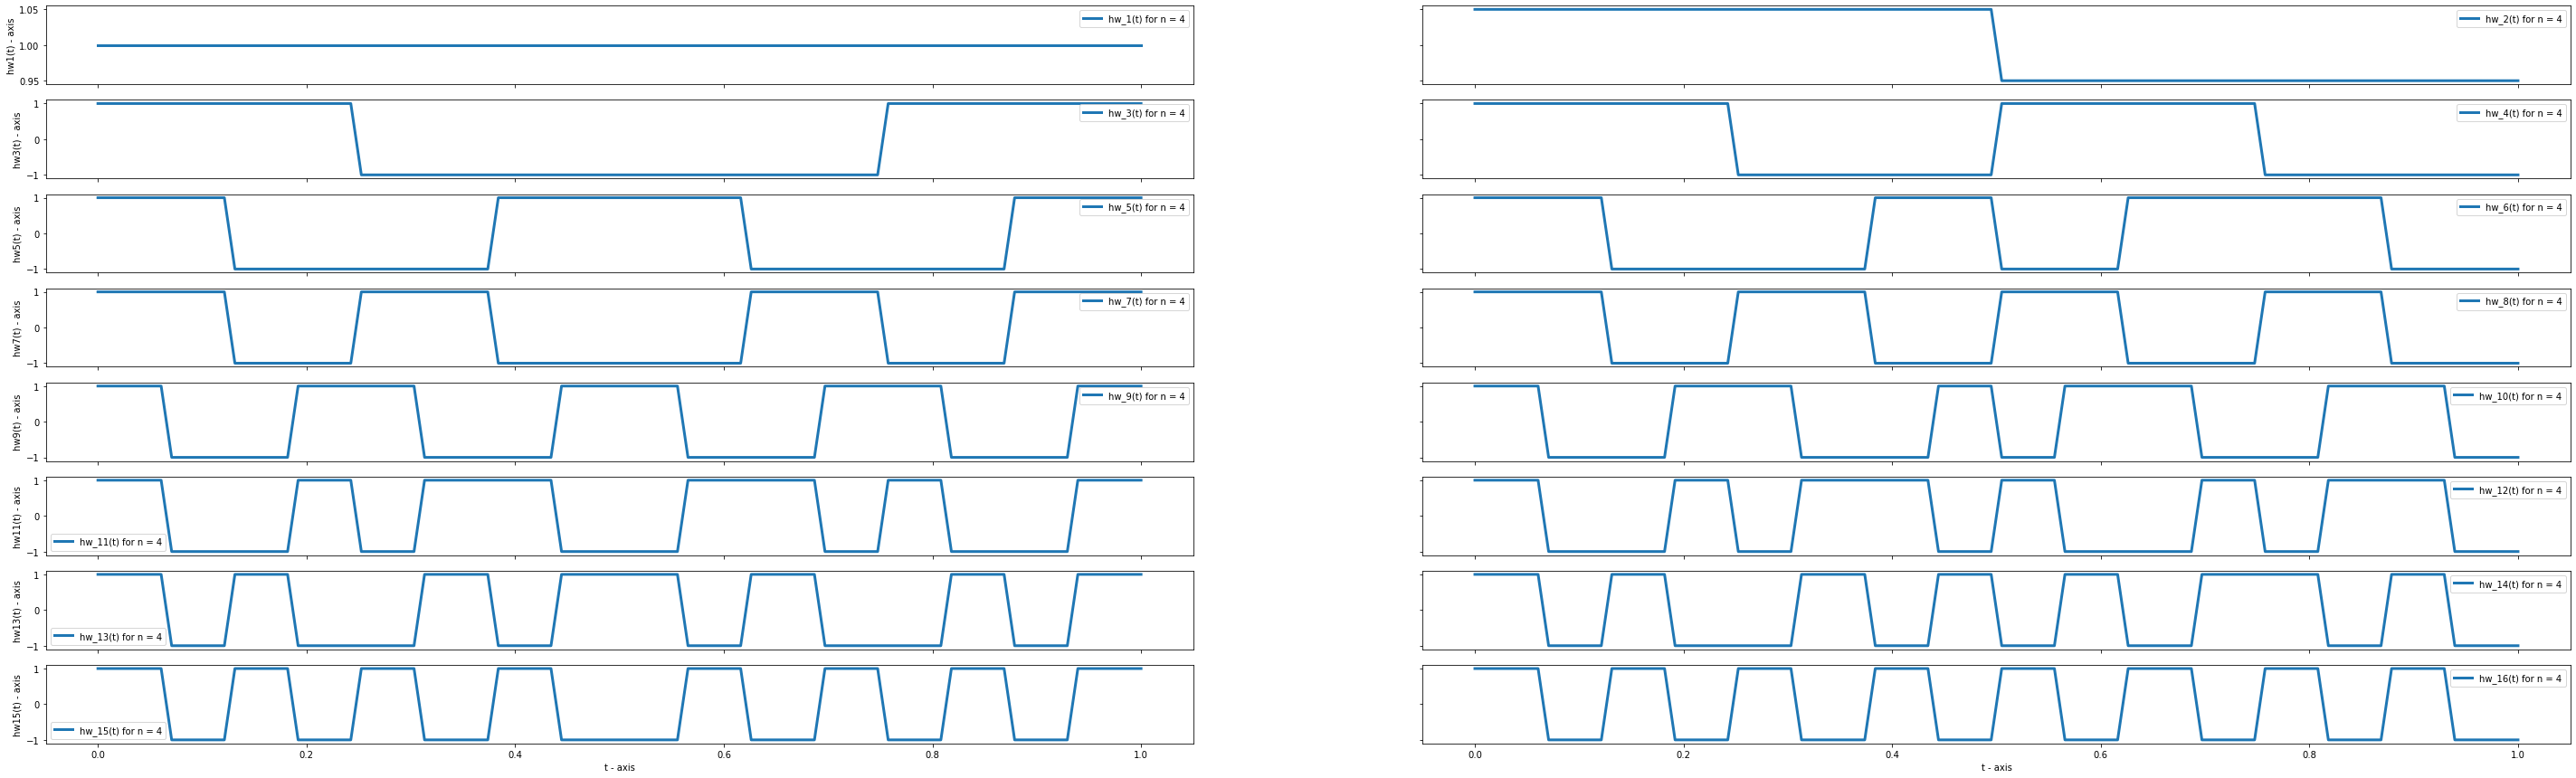

In [248]:
print("Double click on the figure to zoom in.")
print("Ploting functions hw_i(t) for n = 4 (2^n functions)")
plotOrtFunc(4,'hw')

Double click on the figure to zoom in.
Ploting functions hw_i(t) for n = 5 (2^n functions)


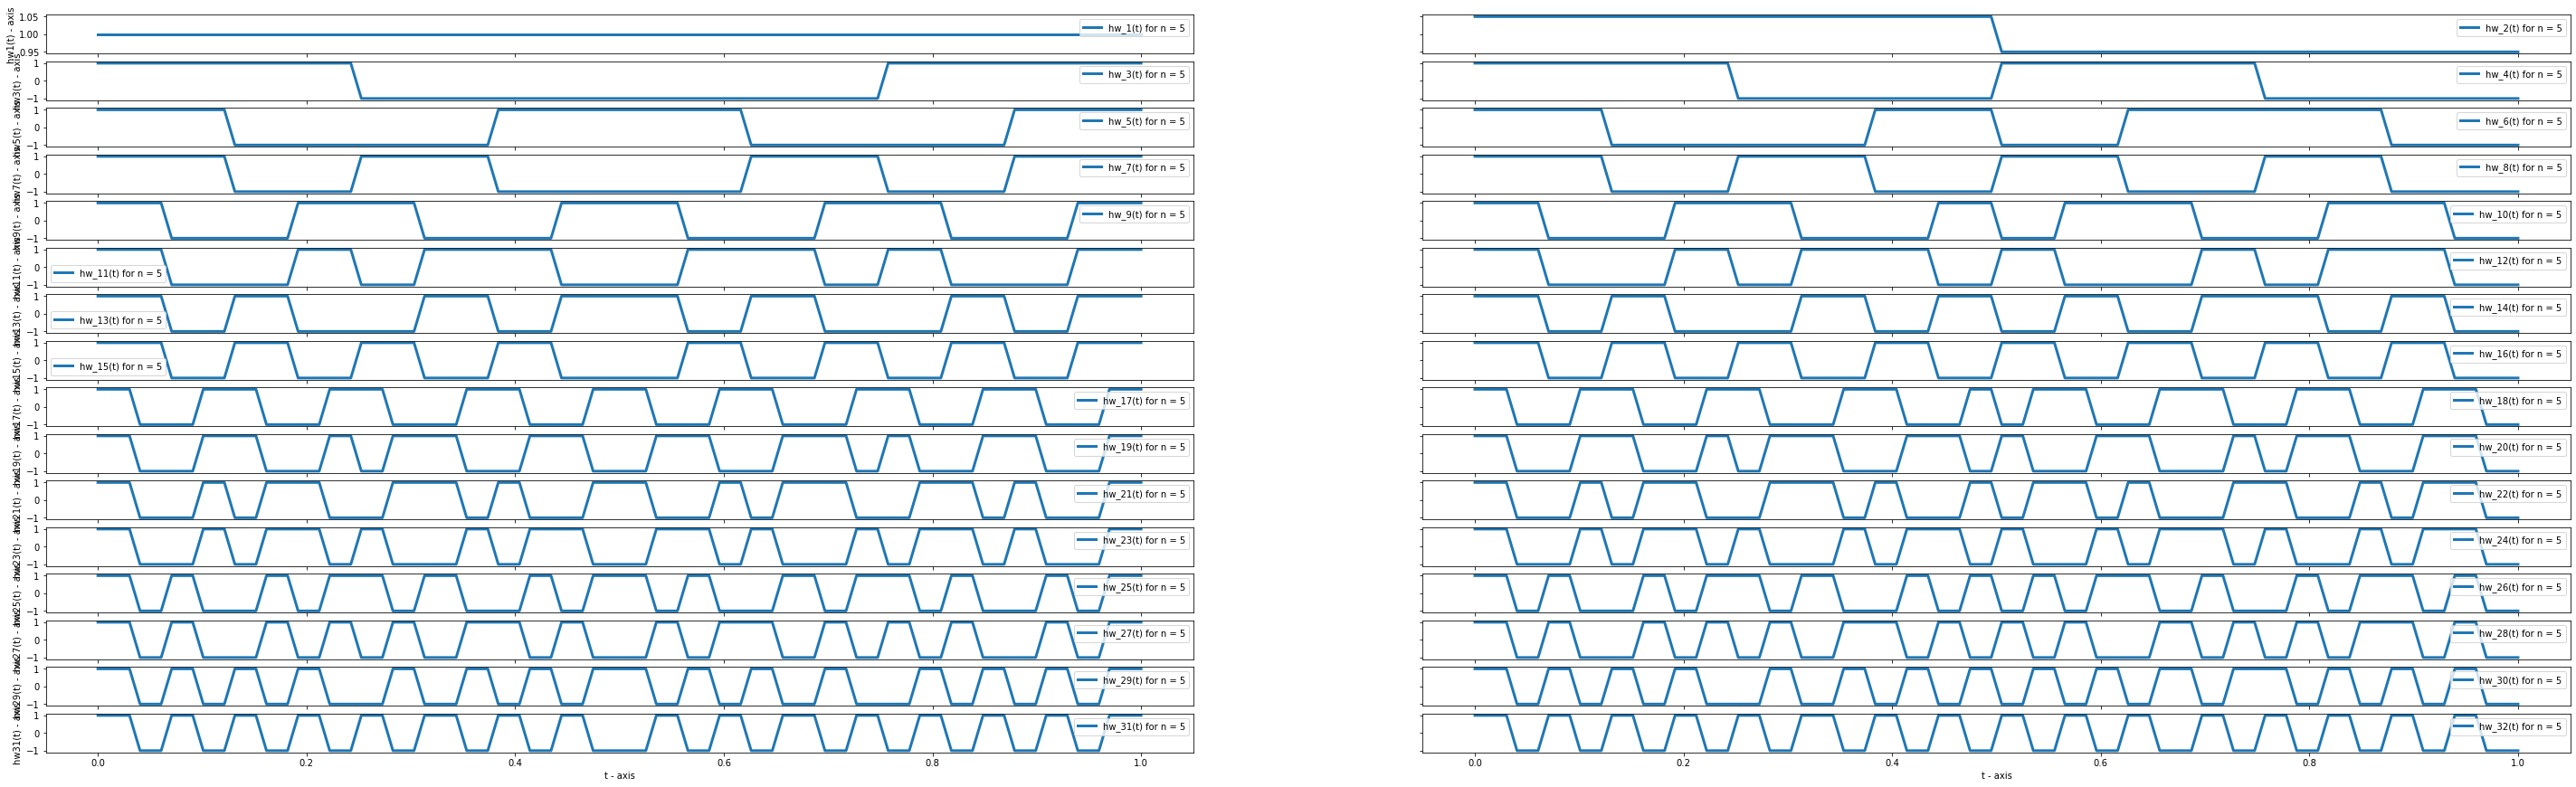

In [249]:
print("Double click on the figure to zoom in.")
print("Ploting functions hw_i(t) for n = 5 (2^n functions)")
plotOrtFunc(5,'hw')

Double click on the figure to zoom in.
Ploting functions hw_i(t) for n = 6 (2^n functions)


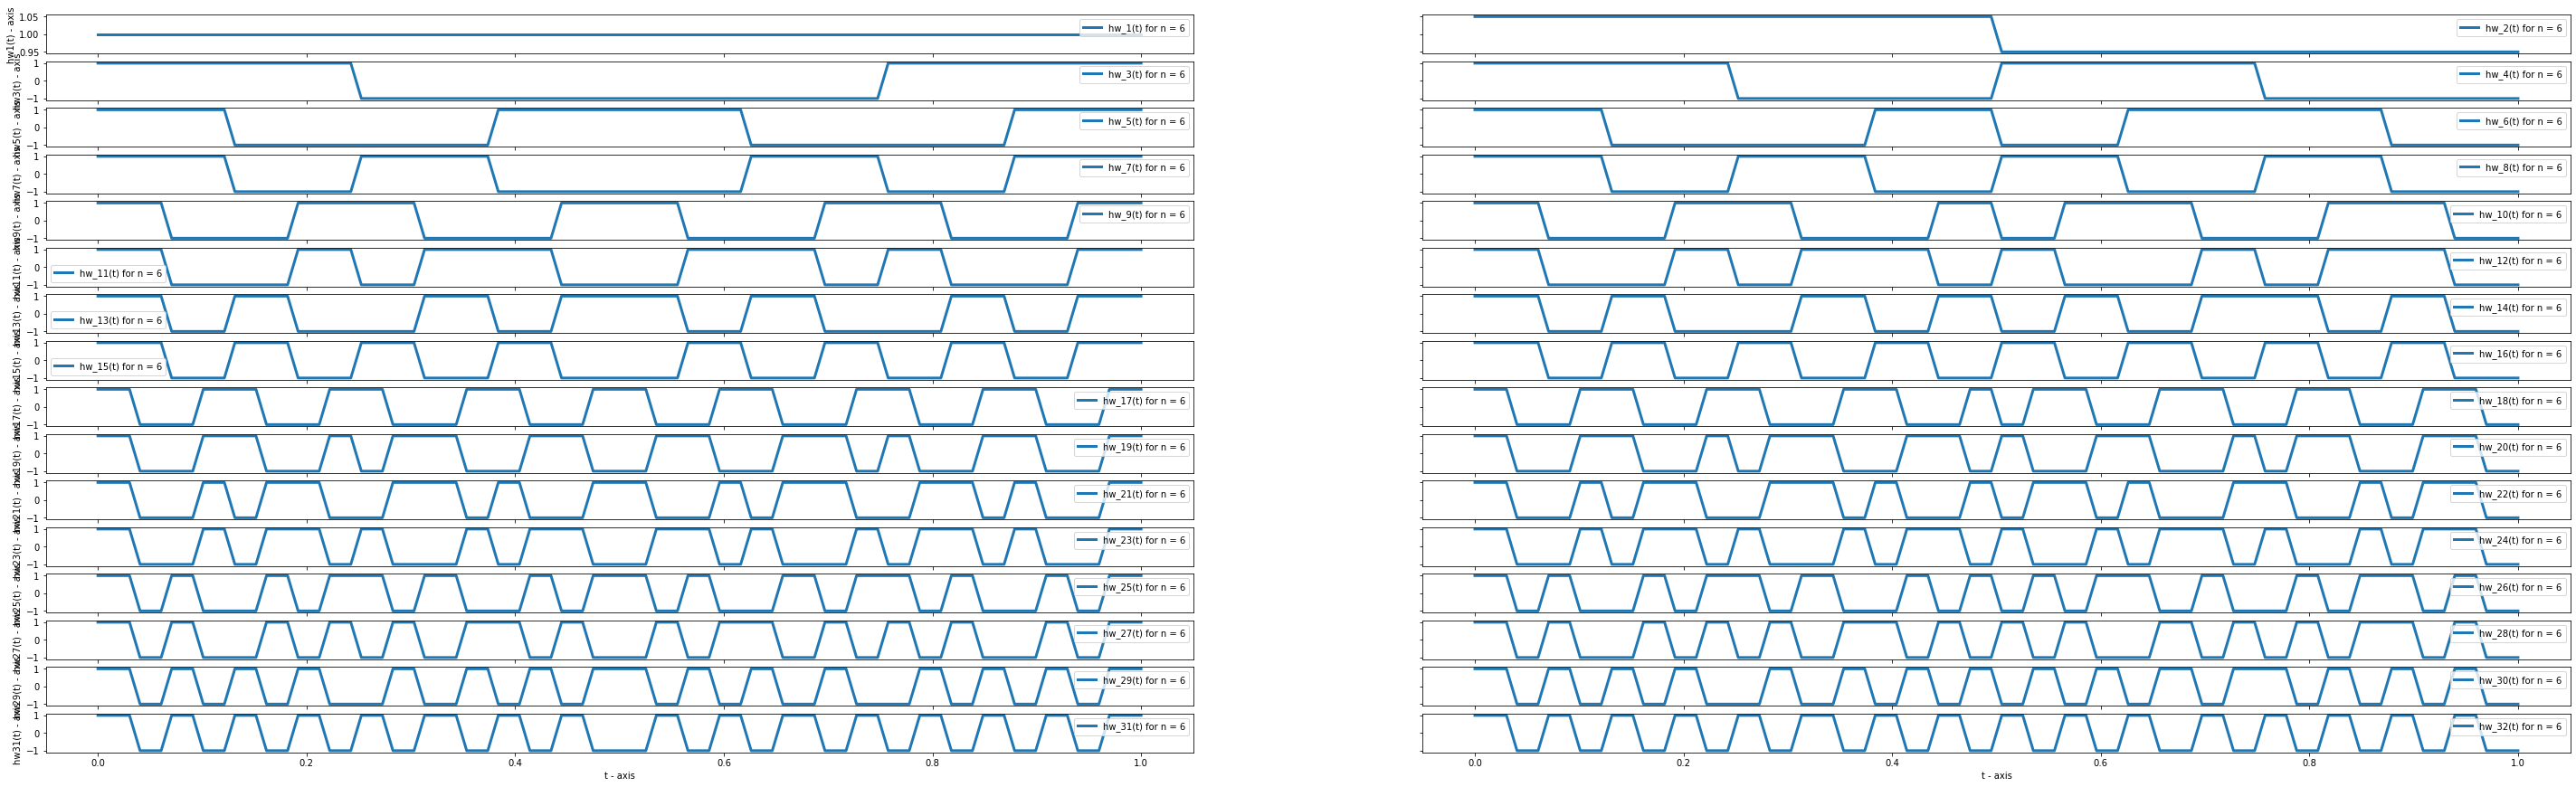

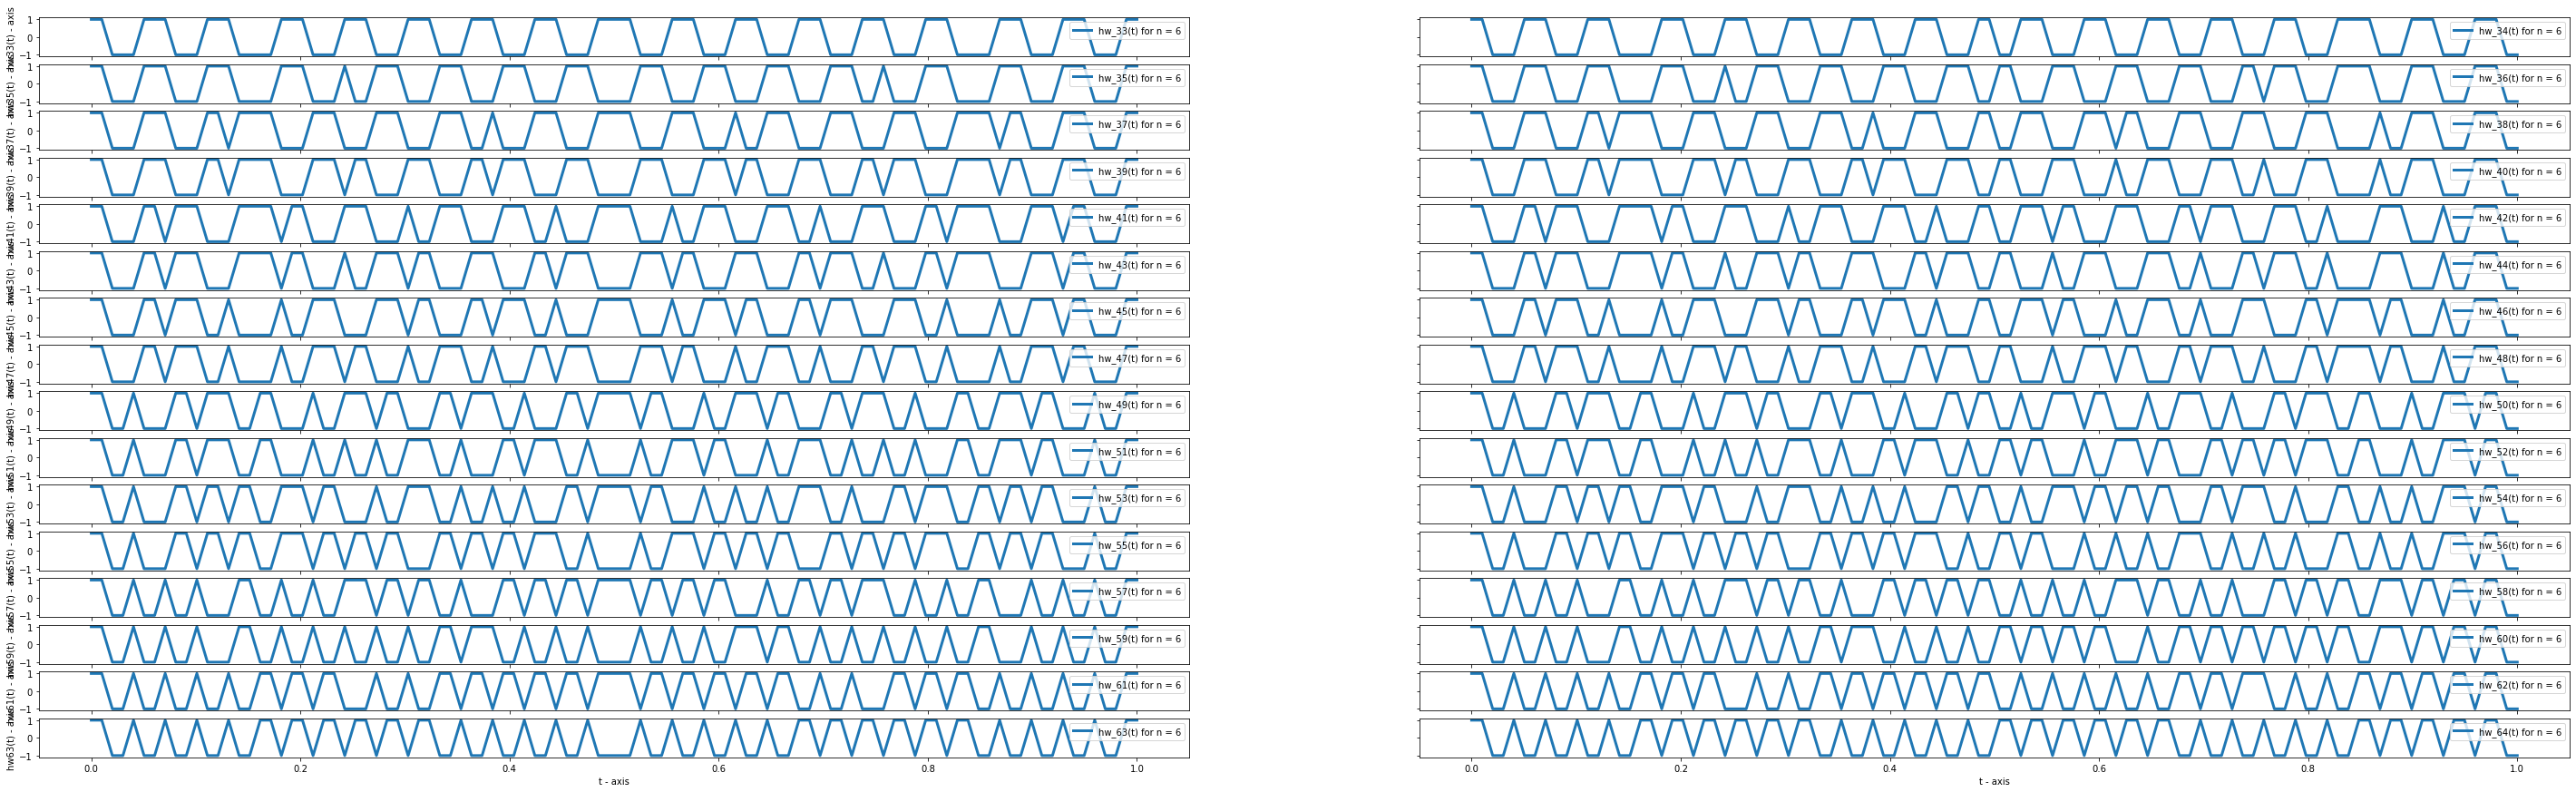

In [250]:
print("Double click on the figure to zoom in.")
print("Ploting functions hw_i(t) for n = 6 (2^n functions)")
plotOrtFunc(6,'hw')

We can see Hadamard -Walsh base is as Hadamard base but it is sorted increasing order by the change of the value in the base function (or the entery in the row of the matrix). 

## 2.e

In [208]:
#calculate numericly the integral of f on [start , end]
def calcIntegral(f , start, end):
    squer_num = 100000
    domain_size=end-start
    uni_delta = domain_size/squer_num
    intg = sum(uni_delta*f( (start+(i-1)*uni_delta + start+i*uni_delta)/2 ) for i in range(1,squer_num+1))
    return intg

In [209]:
#calculate inner product (our coefficients)
#note that this question ask about real function only, so hermit isnt needed
#domain is [d_low , d_high]
def calcInnerProduct(f , g , d_low , d_high):
    multi_fun = lambda t: f(t)*g(t)
    return calcIntegral(multi_fun, d_low, d_high)/(d_high-d_low)

In [210]:
#calculate the coefficients (e.g inner product) of psi with every base function
def coeffficientList(psi_func,ort_func_list ,d_low,d_high):
    coef_list =[]
    for i in range(1,len(ort_func_list)):
        coef_list.append(calcInnerProduct(psi_func,ort_func_list[i],d_low,d_high))
    return coef_list

#find the best order (eg. decreasing order of absulute coeff value)
def bestOrderFunc(coef_list):
    dict_rearange={}
    dict_rearange_abs={}
    sorted_dict = {}
    for i in range(1,len(coef_list)+1):
        dict_rearange[i] = coef_list[i-1]
        dict_rearange_abs[i] = abs(coef_list[i-1]) # we want to rearrange by coeff squred, or simply absolute value  
    sorted_keys = sorted(dict_rearange_abs, key=dict_rearange_abs.get,reverse=True)  
    for w in sorted_keys:
        sorted_dict[w] = dict_rearange[w]
    return sorted_dict
    

In [223]:
#find the best k-approximation of psi from the ort family , k=1,2,3,4
#domain is [d_low , d_high]
def bestKApprox(psi, ort_fun_list , d_low, d_high):
    coef_list_h = coeffficientList(psi,ort_fun_list,d_low,d_high)
    best_dict = bestOrderFunc(coef_list_h)
    best_list_keys=list(best_dict.keys())
    
    approx1=lambda t: sum( (best_dict[best_list_keys[k_ind]] * ort_fun_list[best_list_keys[k_ind]](t)) for k_ind in range(0,1))
    approx2=lambda t: sum( (best_dict[best_list_keys[k_ind]] * ort_fun_list[best_list_keys[k_ind]](t)) for k_ind in range(0,2))
    approx3=lambda t: sum( (best_dict[best_list_keys[k_ind]] * ort_fun_list[best_list_keys[k_ind]](t)) for k_ind in range(0,3))
    approx4=lambda t: sum( (best_dict[best_list_keys[k_ind]] * ort_fun_list[best_list_keys[k_ind]](t)) for k_ind in range(0,4))
    return approx1, approx2, approx3 ,approx4
            

In [218]:
#from scipy import integrate

#calculate MSE between f and g
#domain is [d_low , d_high]
def findMSE(f , g , d_low , d_high):
    squared_err = lambda t: (f(t)-g(t))**2
    return calcIntegral(squared_err, d_low, d_high)/(d_high-d_low)
    

In [219]:
#plot the k-term approximation of psi and the associated MSE
def plotApprox(appr_h , appr_hw , k ,d_low, d_high):
    fig,axes=plt.subplots(nrows=1, ncols=2,figsize=(50,15))
    figure(num=None, figsize=(8, 6), dpi=80, edgecolor='k')

    y_h = calculate_ortft(appr_h,t_arr)
    axes[0].plot(t_arr,y_h, label="best approx "+str(k)+"-term(t) for had, n =2",color='tab:red') # h_i(t)
    #axes[row][col].set_title(str1+ "" +str(i)+"(t) for n = "+str(n))
    axes[0].set(xlabel='t - axis', ylabel="f(t) - axis")
    axes[0].plot(t_arr, y_psi, label='psi(t)',color='blue')
    axes[0].legend()

    print('The MSE for the best '+ str(k) +'-term approximation (n=4)        is '+str(findMSE(psi,appr_h,d_low,d_high)))

    y_hw = calculate_ortft(appr_hw,t_arr)
    axes[1].plot(t_arr,y_hw, label="best approx "+str(k)+"-term(t) for hadWal, n =2",color='tab:red') # hw_i(t)
    axes[1].set(xlabel='t - axis', ylabel="f(t) - axis")
    axes[1].plot(t_arr, y_psi, label='psi',color='blue')
    axes[1].legend()
    
    #print('The MSE for the best '+ str(k) +'-term approximation (Walsh-Hadamard base - right one, n=4) is '+str(findMSE(psi,appr_hw,d_low,d_high)))

In [220]:
n = 2 #Given
low = -4
high = 5
#our signal , domain is [-4 , 5] (here outside of domain will be 0 but approximation is inside the domain)
psi = lambda t: t * math.exp( t ) if low <= t and t <= high  else 0 

In [221]:
had_func_list = OrtBaseFunc(n,'h' ,low , high)
hadaW_func_list = OrtBaseFunc(n,'hw' ,low , high)
t_arr = np.linspace(low,high,100) # 100 linearly spaced numbers for sampling function
y_psi = calculate_ortft(psi,t_arr)

### Hadamard approximations

In [224]:
approx1_h , approx2_h ,approx3_h , approx4_h= bestKApprox(psi,had_func_list,low,high)

### Hadamard - Walsh approximations

In [225]:
approx1_hw ,approx2_hwapprox2_hw , approx3_hw ,approx4_hw = bestKApprox(psi,hadaW_func_list,low,high)

The MSE for the best 1-term approximation (n=4)        is 20711.93522678371


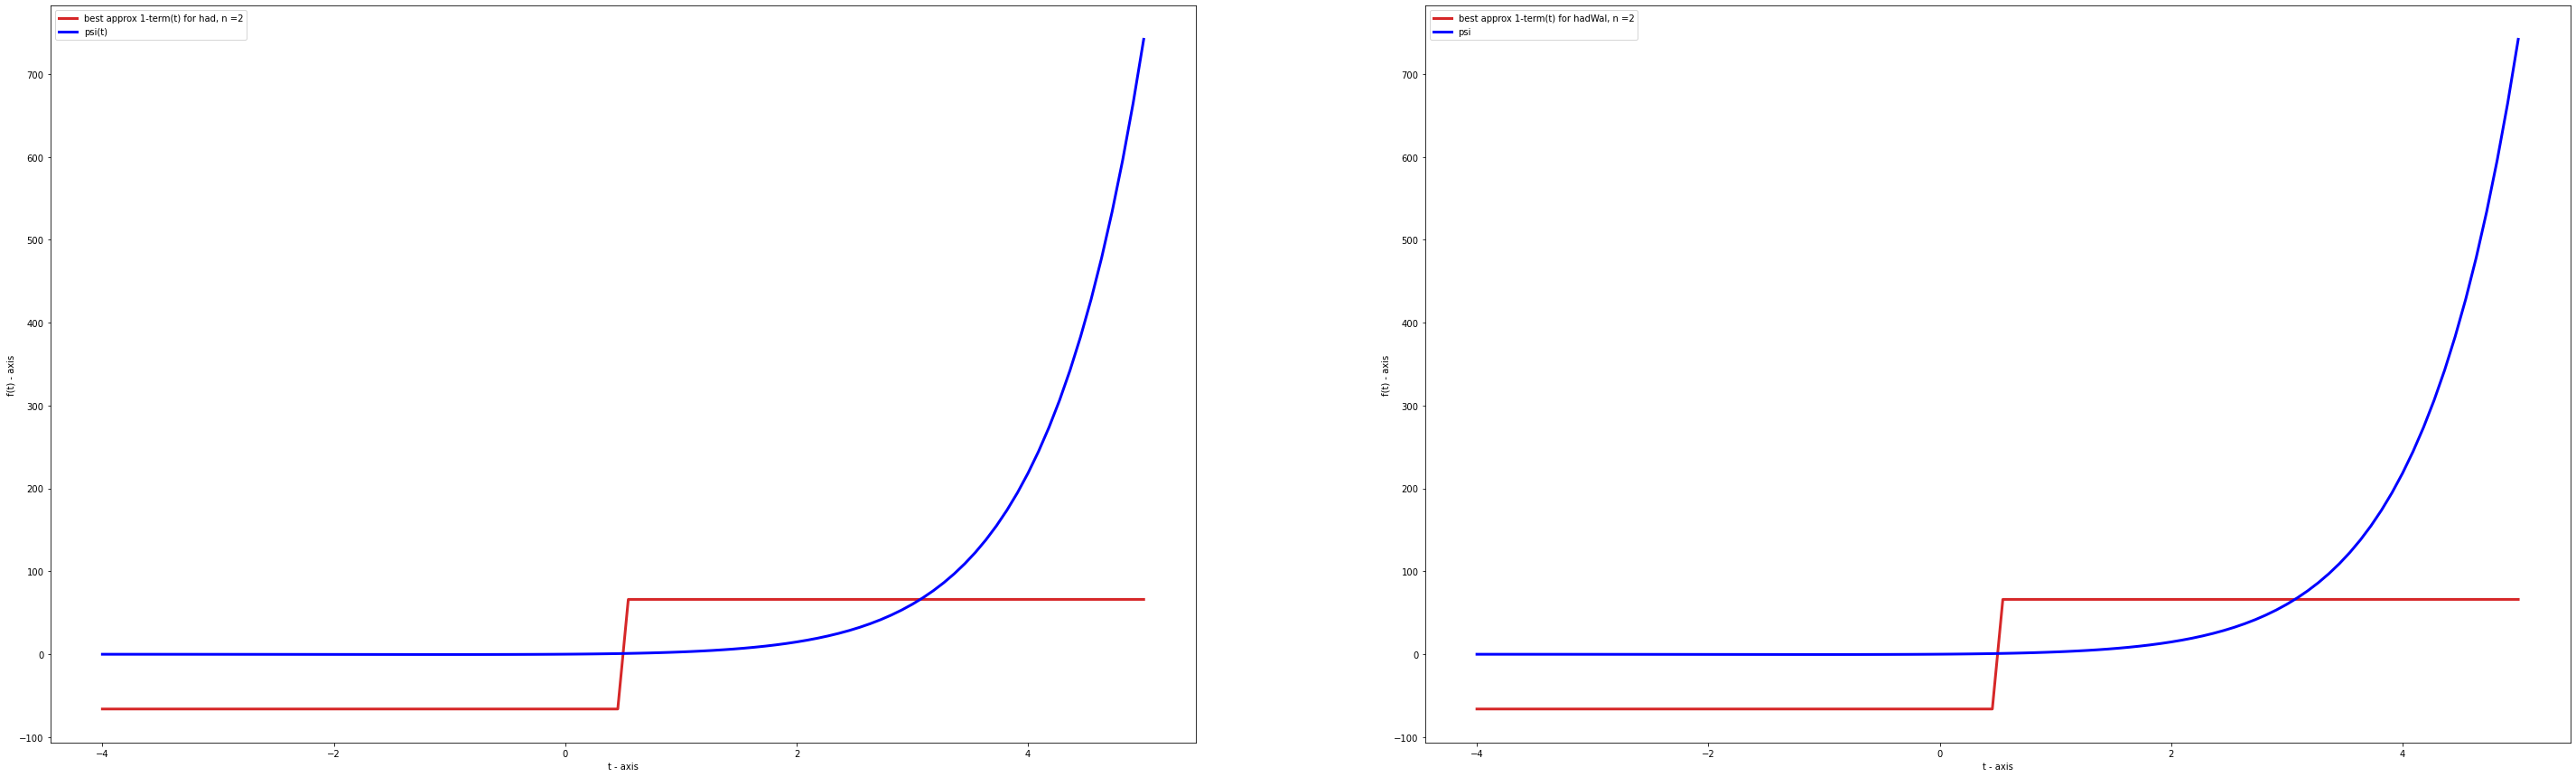

<Figure size 640x480 with 0 Axes>

In [252]:

plotApprox(approx1_h,approx1_hw,1, low, high)



The MSE for the best 2-term approximation (n=4)        is 16359.685942589838


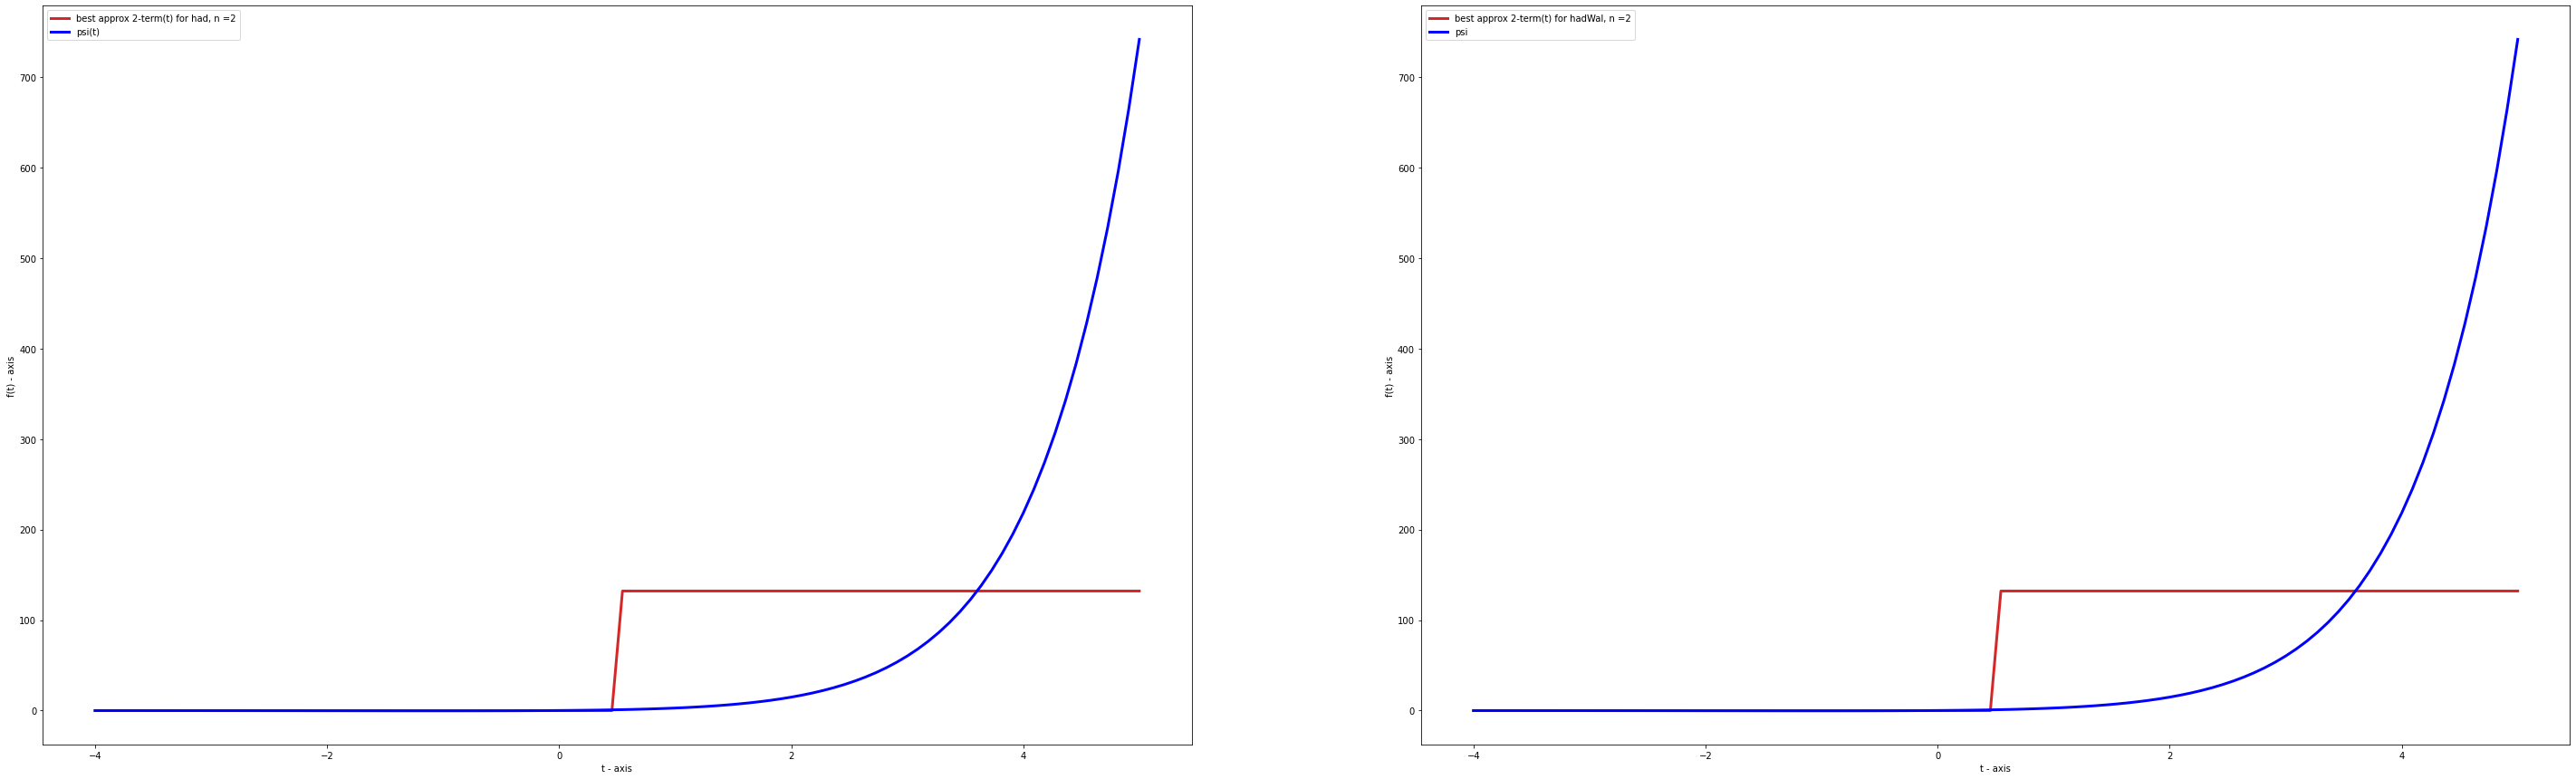

<Figure size 640x480 with 0 Axes>

In [254]:
plotApprox(approx2_h,approx2_hw,2, low, high)

The MSE for the best 3-term approximation (n=4)        is 12784.723832408177


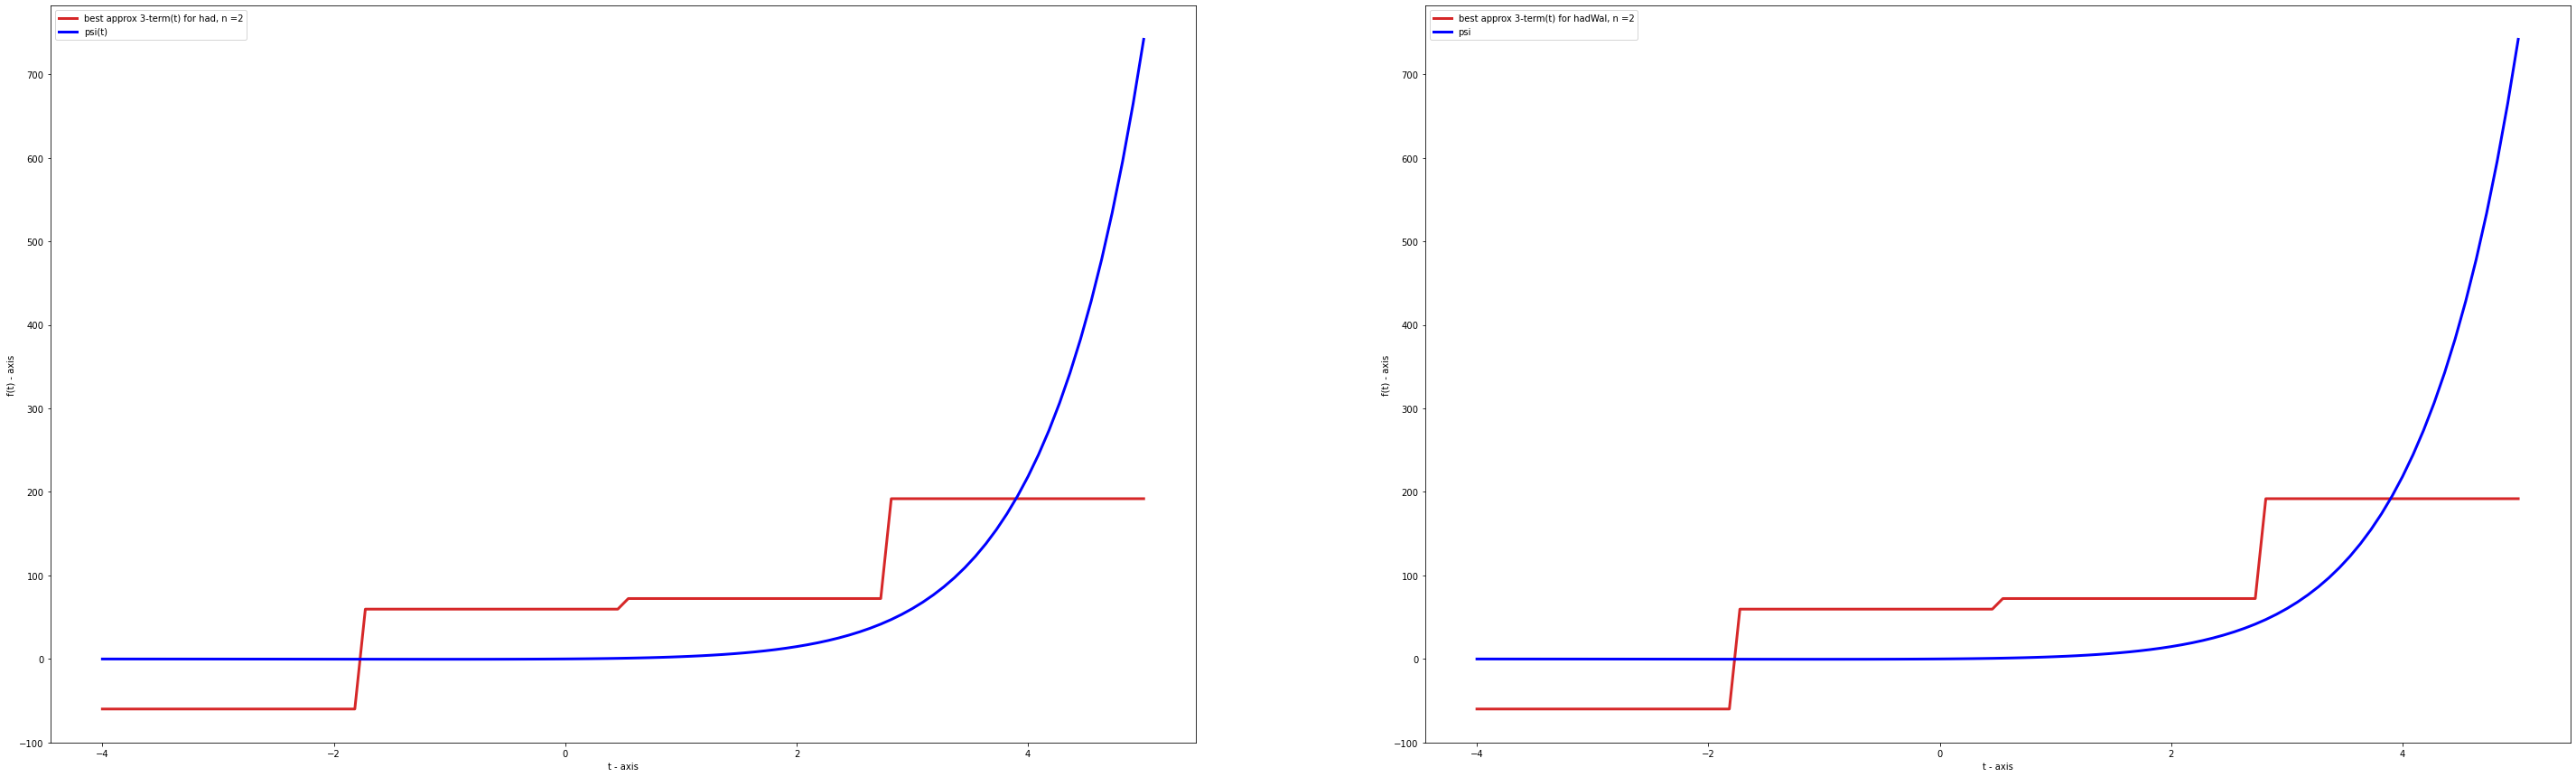

<Figure size 640x480 with 0 Axes>

In [255]:
plotApprox(approx3_h,approx3_hw,3, low, high)

The MSE for the best 4-term approximation (n=4)        is 9210.819754617105


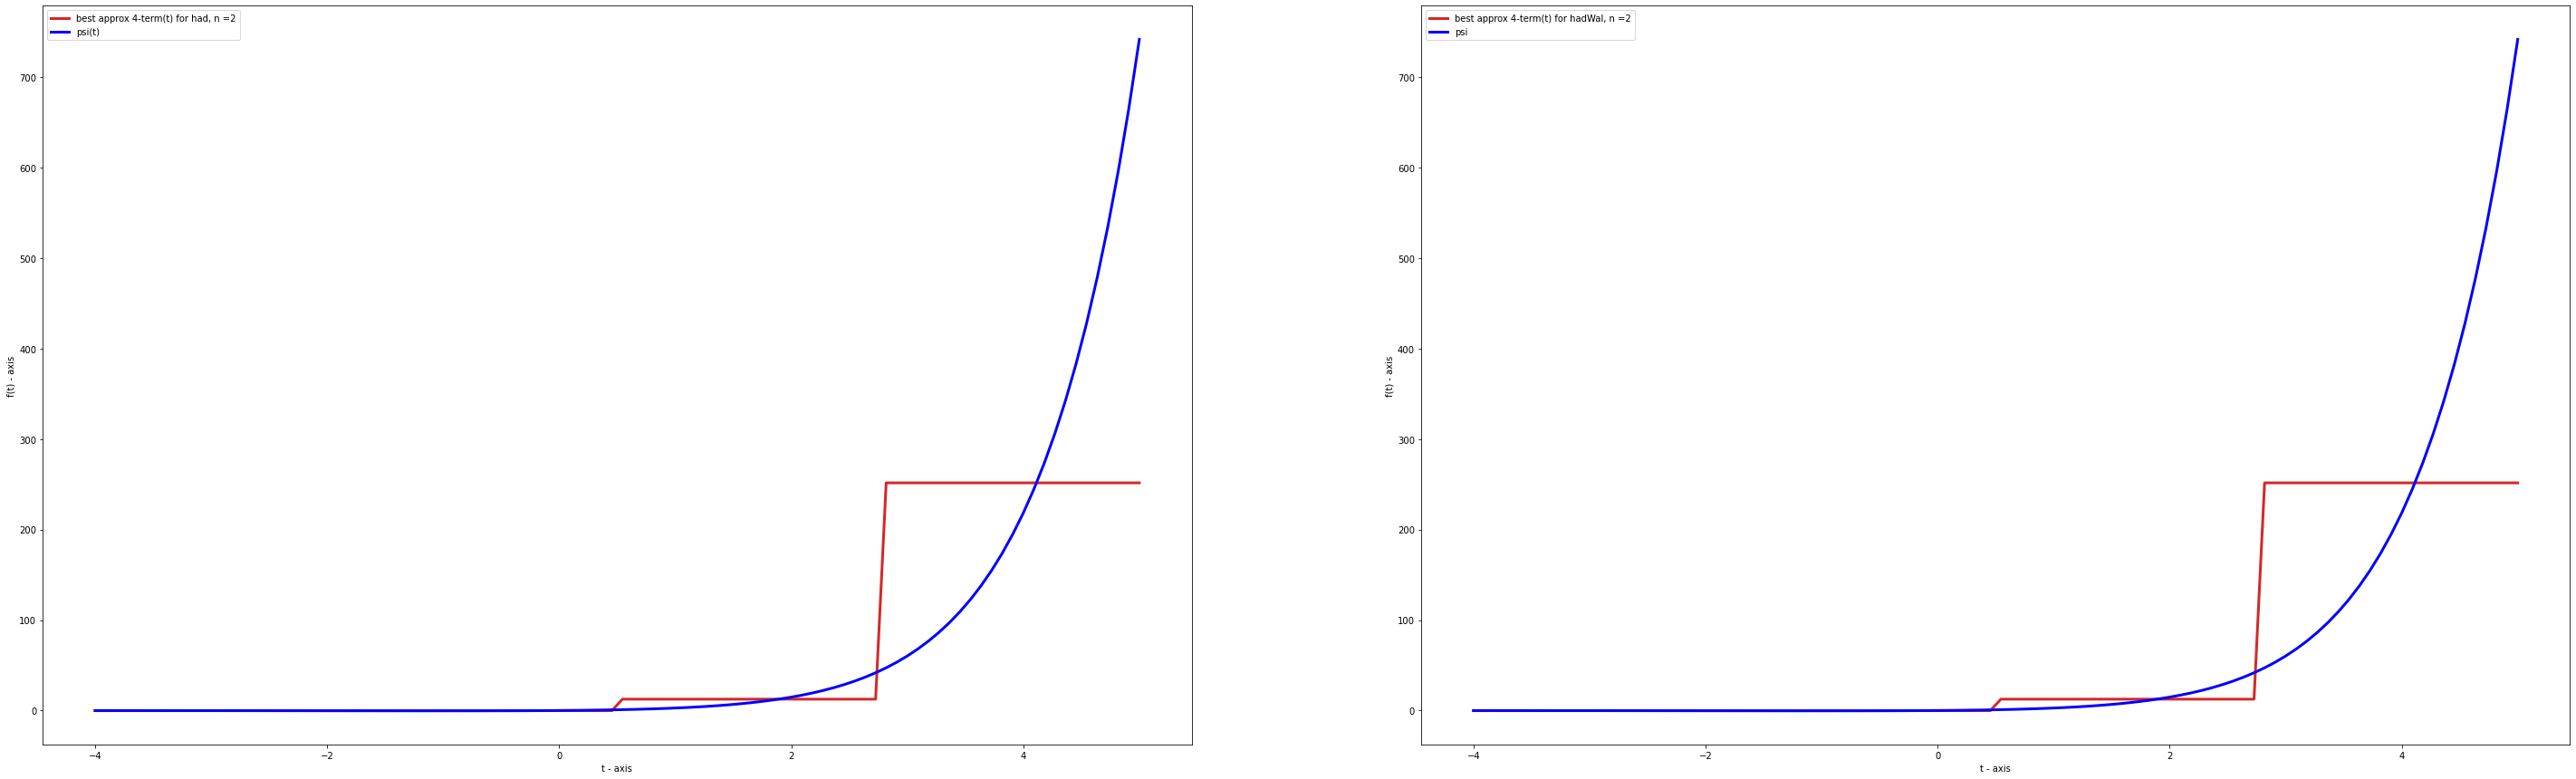

<Figure size 640x480 with 0 Axes>

In [256]:
plotApprox(approx4_h,approx4_hw,4, low, high)

#### We can see that the best k-term approximation of Hadamard base and Walsh - Hadamard base are the same. The reason is when we find the best k-term aproximation we have to sort our coefficients by absolute value (for minimizing MSE) and choose the first k.
#### Walsh - Hadamard base is the same as Hadamard base, only the first order is diffrent so after sorting it will be the same approximation both.
#### We can see that MSE is in downward trend as we learned about in class.